In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('train.csv')
print(data.shape)

data.head()

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.drop('Id', axis=1, inplace=True)
print(data.shape)

data.head()

(1460, 80)


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

# Data Analysis

# The Target Varible

In [5]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

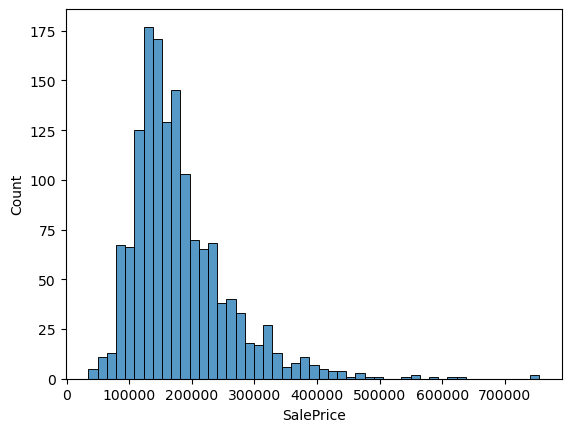

In [6]:
sns.histplot(data=data, x='SalePrice')

plt.show()

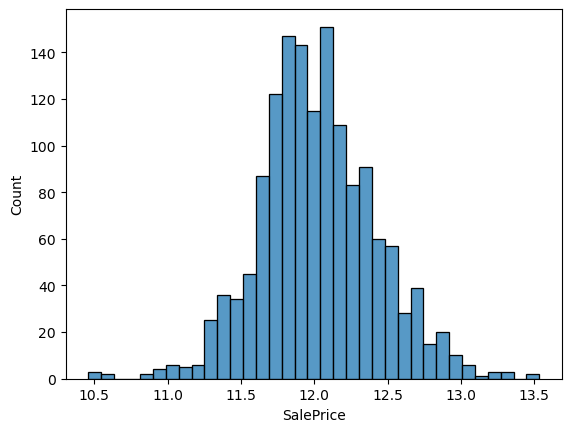

In [7]:
sns.histplot(data=np.log(data['SalePrice']))
plt.show()

* **Distribution is more like Gaussian. Which helps improves the performance of the model**

# Variables Types

In [8]:
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

categorical_features = categorical_features + ['MSSubClass']

print("There are {} categorical features in the dataset.".format(len(categorical_features)))

There are 44 categorical features in the dataset.


In [9]:
data[categorical_features] = data[categorical_features].astype('O')

In [10]:
numerical_features = [feature for feature in data.columns if feature not in categorical_features and feature != 'SalePrice']

print("There are {} numerical features in the dataset.".format(len(numerical_features)))

There are 35 numerical features in the dataset.


# Missing Values

In [11]:
features_with_missingvalues = [feature for feature in data.columns if data[feature].isnull().sum() > 0 ]

In [12]:
data[features_with_missingvalues].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

## Visualizing the percentage of missing values:

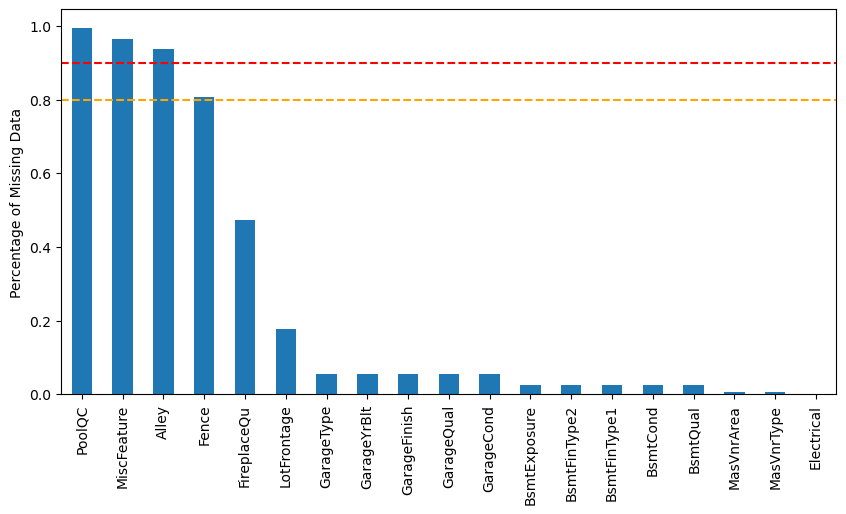

In [13]:
data[features_with_missingvalues].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 5))

plt.ylabel('Percentage of Missing Data')
plt.axhline(y=0.90, color='red', linestyle='--')
plt.axhline(y=0.80, color='orange', linestyle='--')

plt.show()

In [14]:
categorical_features_with_na = [feature for feature in categorical_features if feature in features_with_missingvalues]
numerical_features_with_na = [feature for feature in numerical_features if feature in features_with_missingvalues]

print("Number of Categorical Features with missing values are: {}".format(len(categorical_features_with_na)))
print("Number of Numerical Features with missing values are: {}".format(len(numerical_features_with_na)))

Number of Categorical Features with missing values are: 16
Number of Numerical Features with missing values are: 3


## Relationship between missing data and SalePrice (Dependent Variable)

In [15]:
def analyse_na_values(df, feature):
    df = df.copy(deep=True)
    df[feature] = np.where(df[feature].isnull(), 1, 0) # 1 if the value is missing in the feature else 0
    tmp = df.groupby(feature)['SalePrice'].agg(['mean', 'std']) # Grouping the feature whether the value is present of not and taking the SalePrice of each of them and calculating the mean and std.
    
    tmp.plot(kind='barh', y='mean', legend=False, xerr='std', title='Sale Price', color='green')
    
    plt.show()

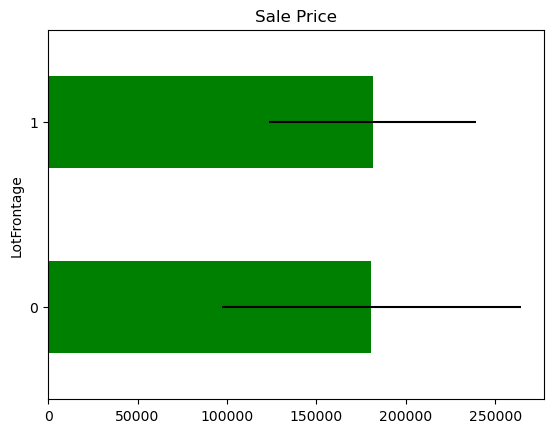

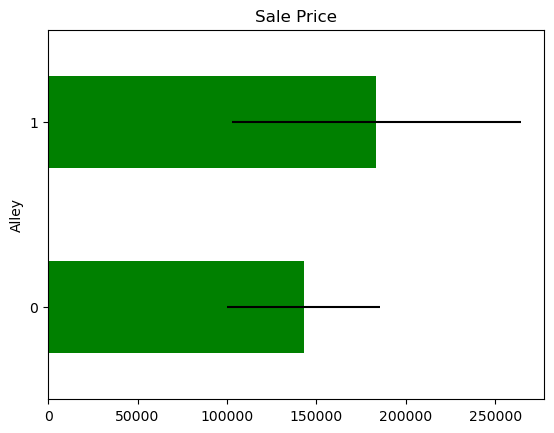

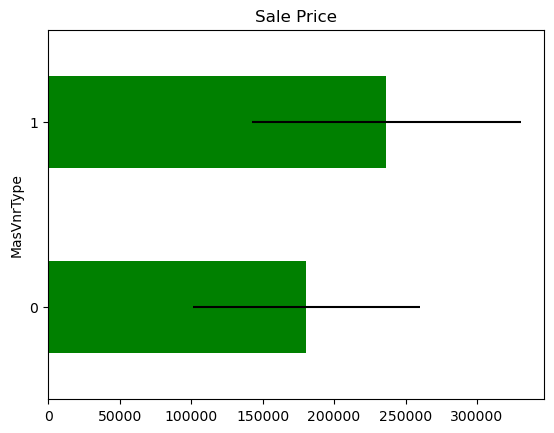

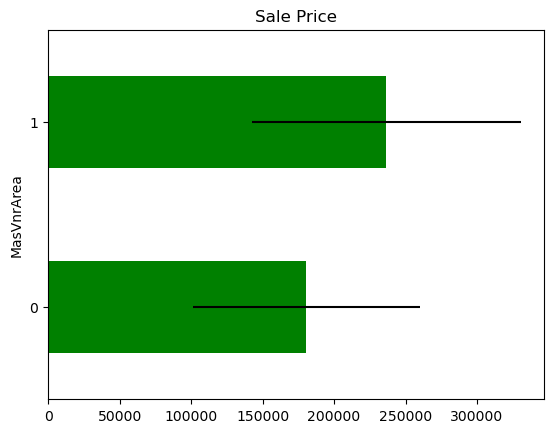

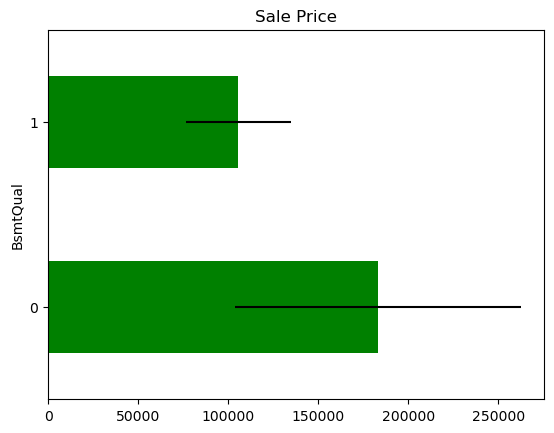

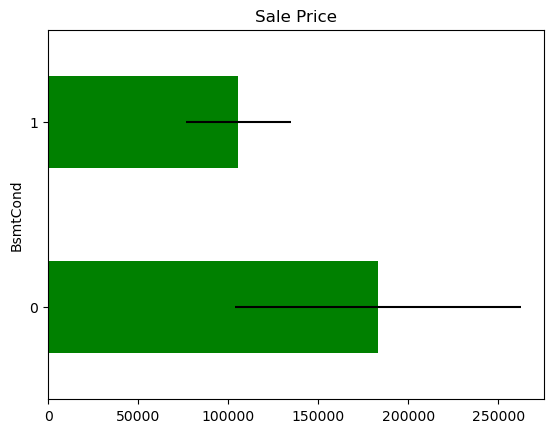

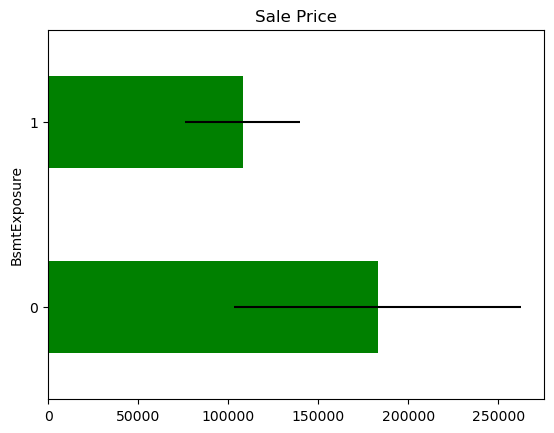

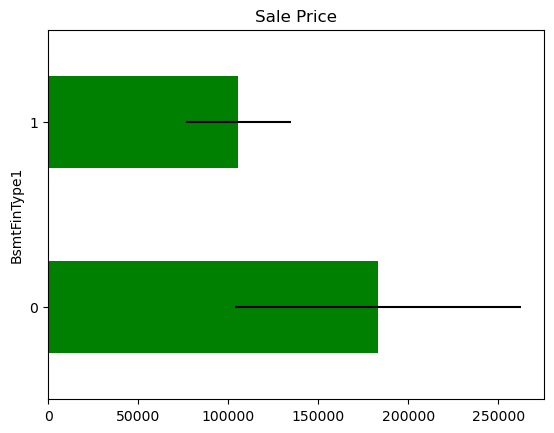

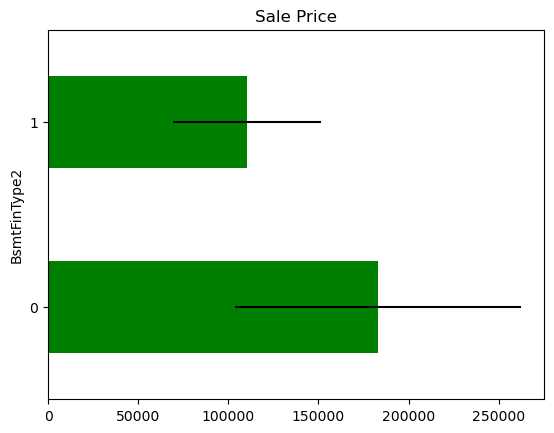

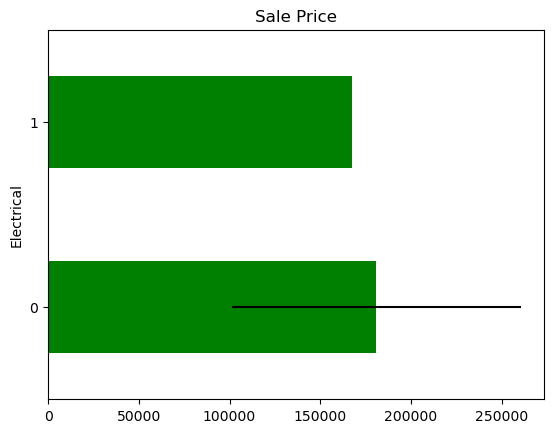

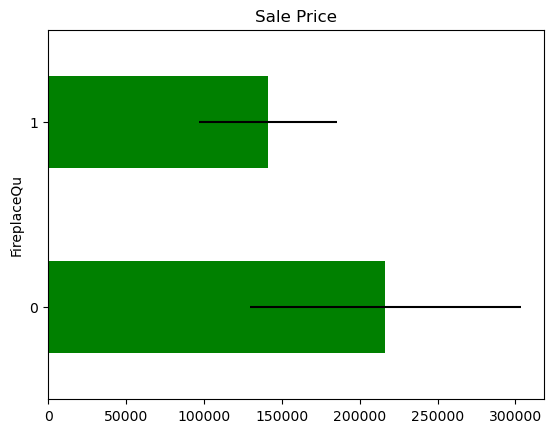

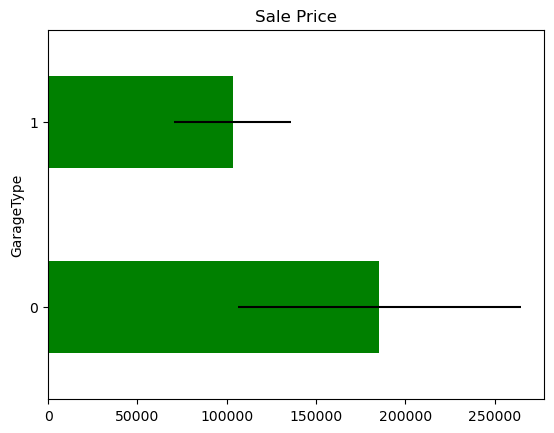

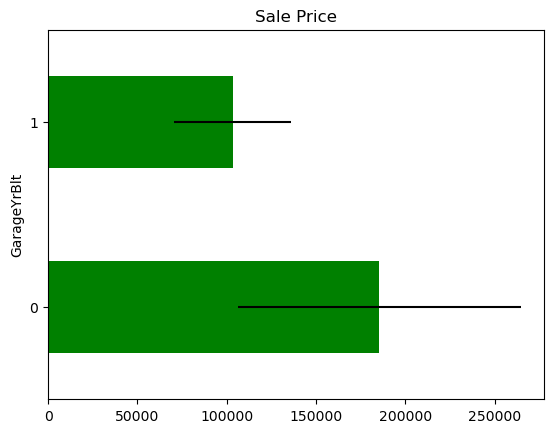

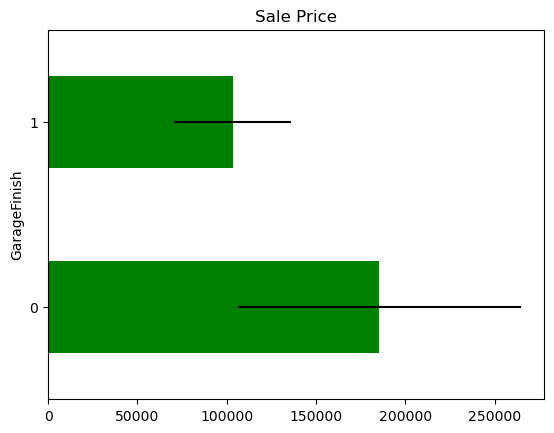

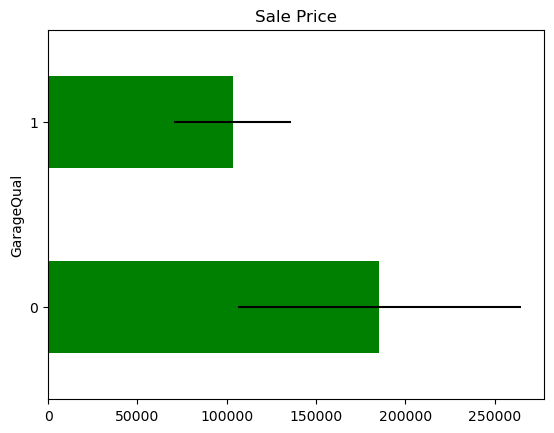

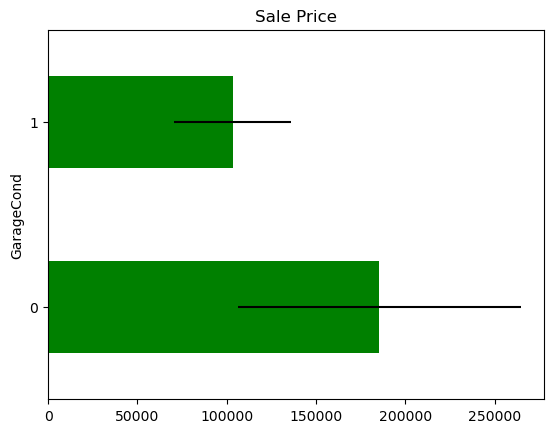

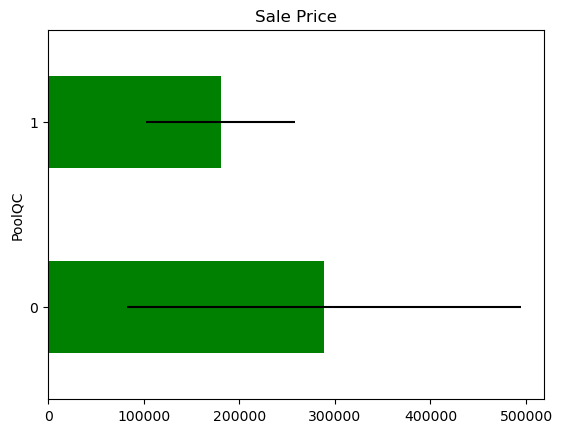

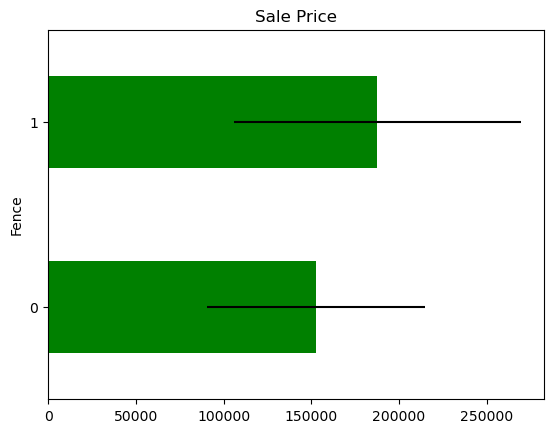

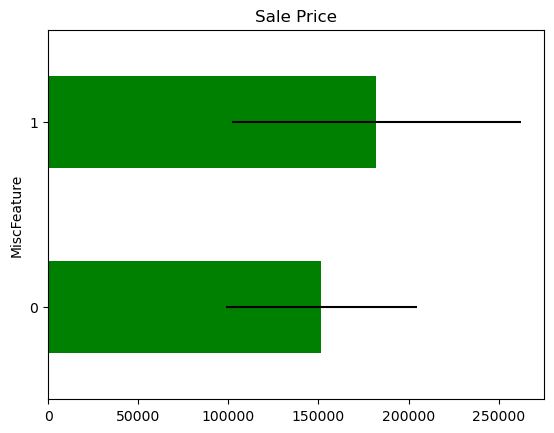

In [16]:
for feature in features_with_missingvalues:
    analyse_na_values(data, feature)

# Numerical Variables

In [17]:
print("Total number of numerical features are: {}".format(len(numerical_features)))
data[numerical_features].head()

Total number of numerical features are: 35


LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  
0              0          0            0         0        0       2    2008  
1              0          0            0         0        0       5    2007  
2              0          0            0         0        0       9    2008  
3            272          0            0         0        0       2    2006  
4              0          0            0         0        0      12    2008

In [18]:
temporal_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
for feature in temporal_features:
    print(feature, data[feature].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

## SalePrice vs YrSold

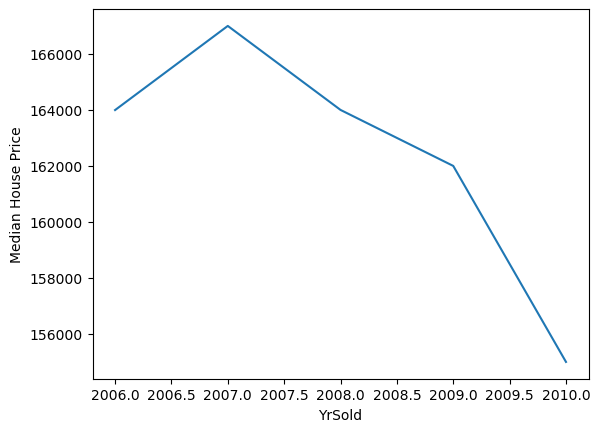

In [20]:
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')

plt.show()

## SalePrice vs YearBuilt

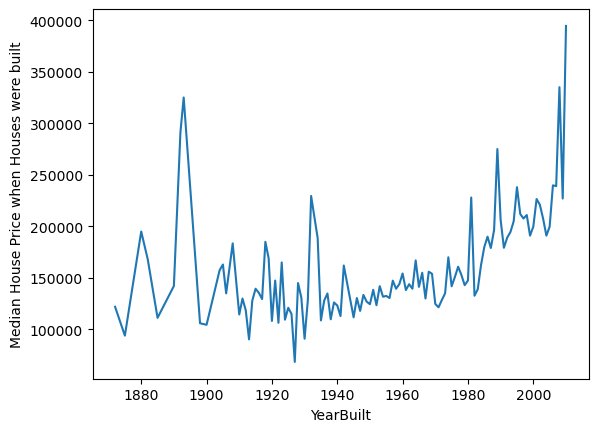

In [21]:
data.groupby('YearBuilt')['SalePrice'].median().plot()

plt.ylabel('Median House Price when Houses were built')
plt.show()

## How SalePrice was when houses were sold lately.

In [22]:
def analyse_temporal_features(df, feature):
    df = df.copy()
    df[feature] = df['YrSold'] - df[feature] # difference between year and yearsold
    
    df.groupby('YrSold')[feature].median().plot()
    plt.ylabel('Time From ' + feature)
    plt.show()

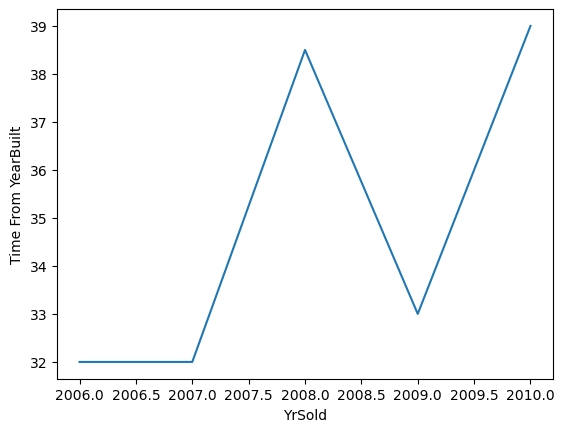

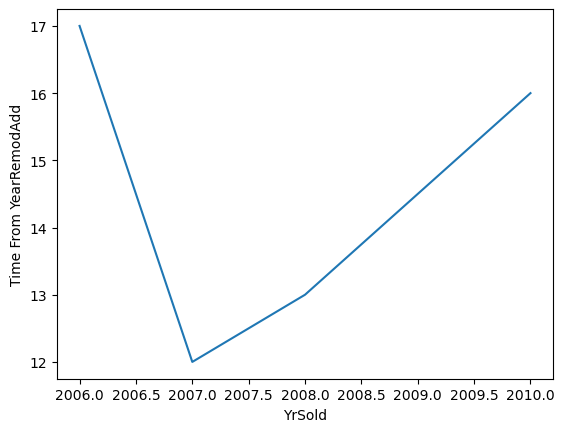

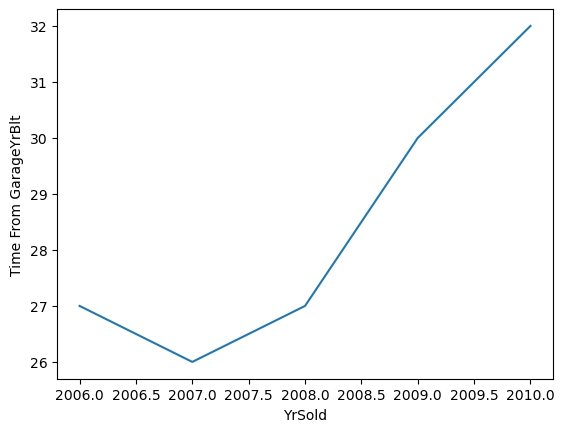

In [23]:
for feature in temporal_features:
    if feature != 'YrSold':
        analyse_temporal_features(data, feature)

# y-axis numbers indicate that: For example:
# 38 on yaixs from first the plot means: 38 years between the house sold and it was built.
# second plot tells us that for example: 16 years between house was sold and it remodeled.

In [24]:
def analyse_temporal_features(df, feature):
    df = df.copy()
    df[feature] = df['YrSold'] - df[feature] # difference between year and yearsold
    
    plt.scatter(df[feature], df['SalePrice'])
    
    plt.ylabel('Sale Price')
    plt.xlabel(feature)
    plt.show()

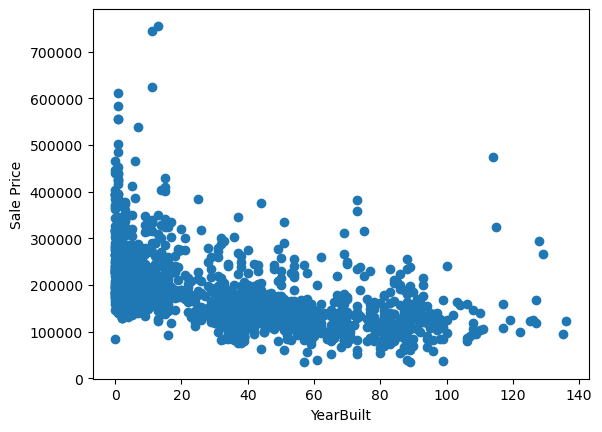

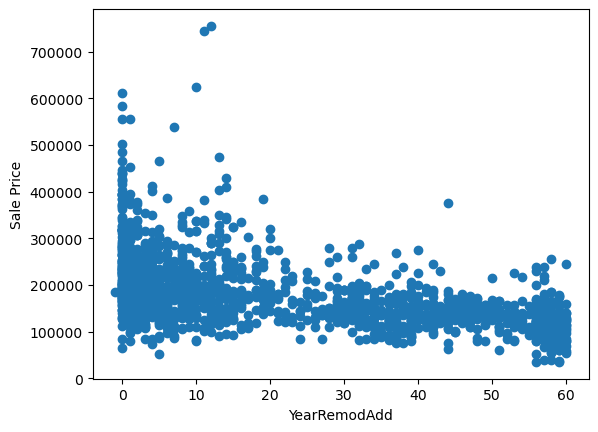

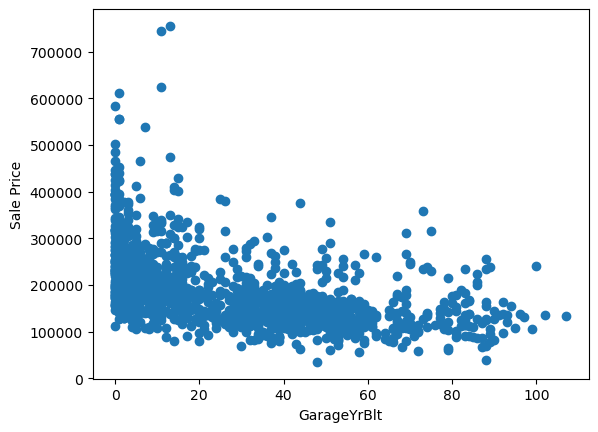

In [25]:
for feature in temporal_features:
    if feature != 'YrSold':
        analyse_temporal_features(data, feature)

# Discrete Variables

In [26]:
# Suitable only for this dataset only
discrete_features = [feature for feature in numerical_features if data[feature].nunique() < 20 and feature not in temporal_features]

print("Number of discrete Variables: {}".format(len(discrete_features)))

Number of discrete Variables: 13


In [27]:
data[discrete_features].head()

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  PoolArea  \
0             3             1             8           0           2         0   
1             3             1             6           1           2         0   
2             3             1             6           1           2         0   
3             3             1             7           1           3         0   
4             4             1             9           1           3         0   

   MoSold  
0       2  
1       5  
2       9  
3       2  
4      12

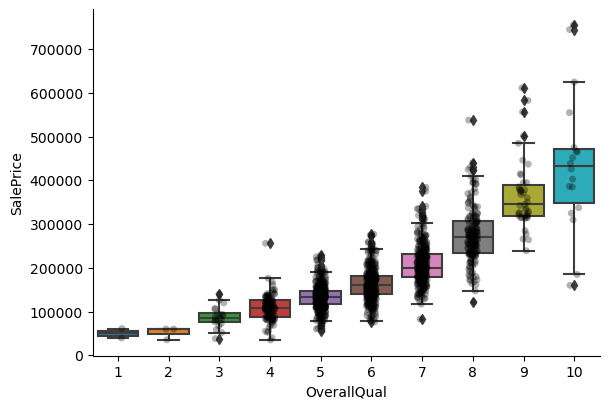

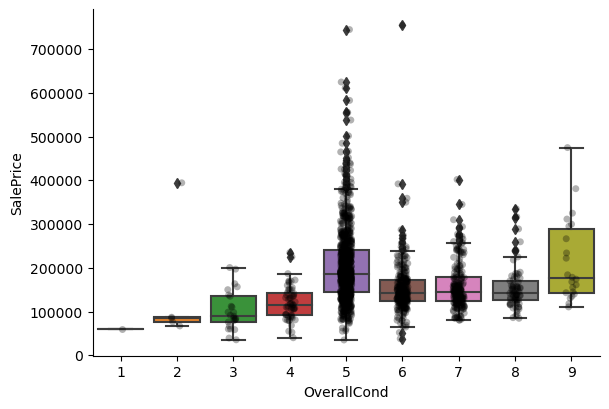

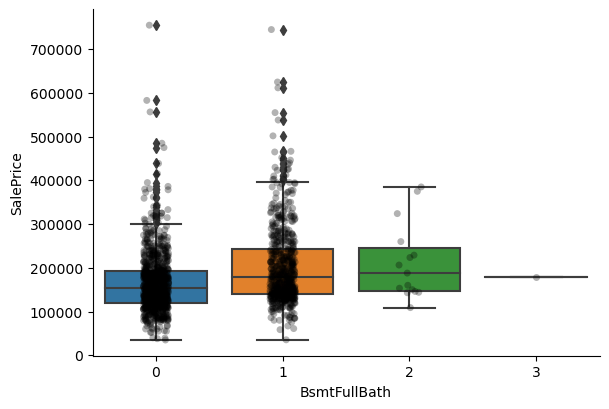

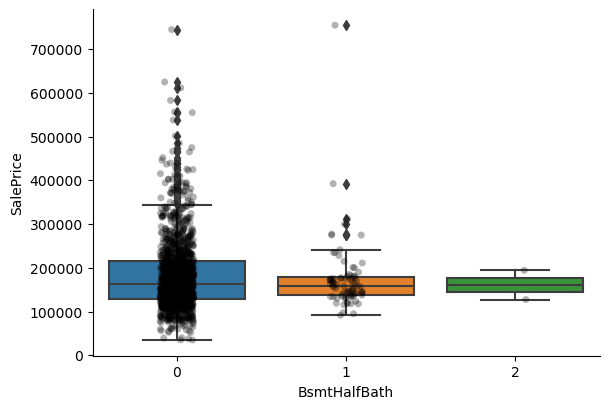

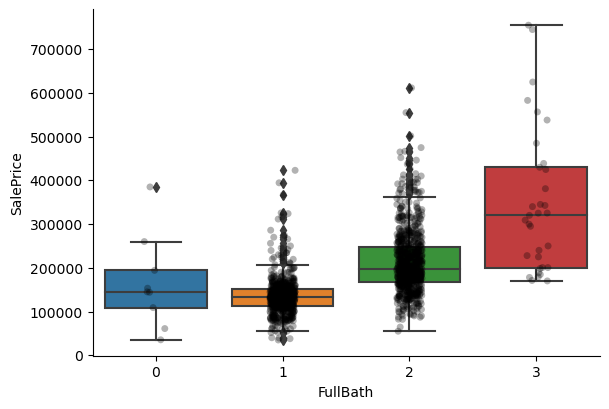

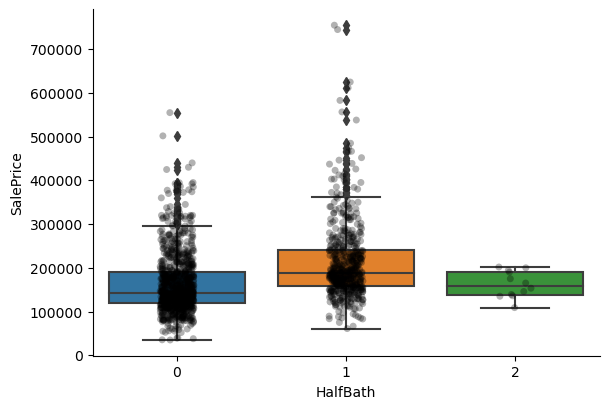

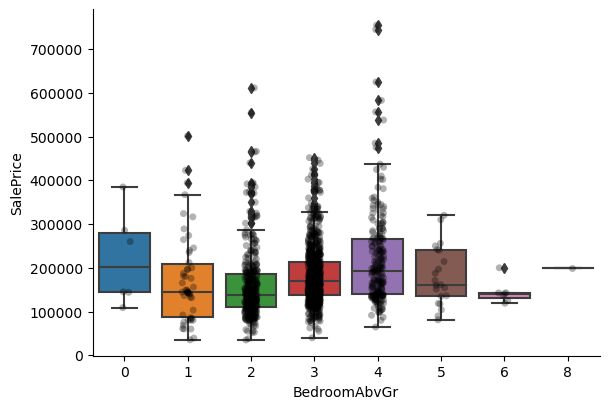

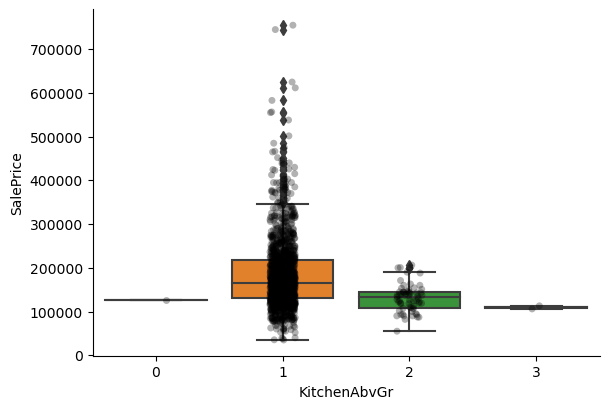

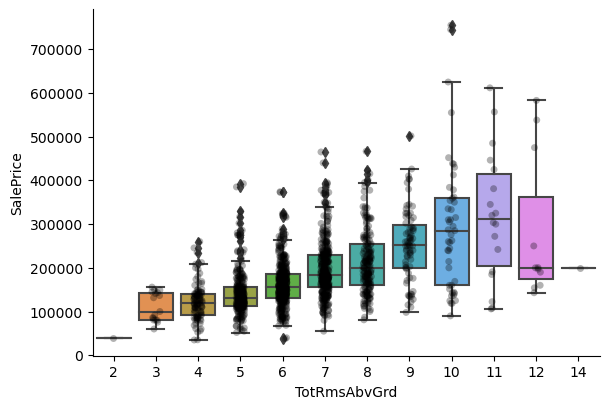

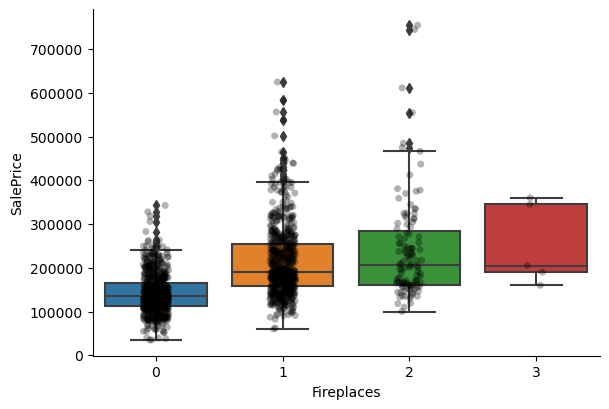

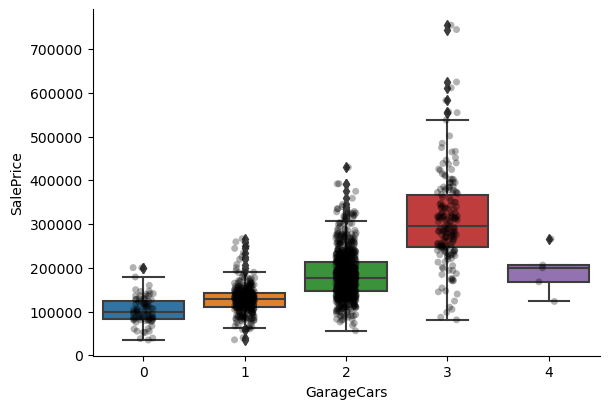

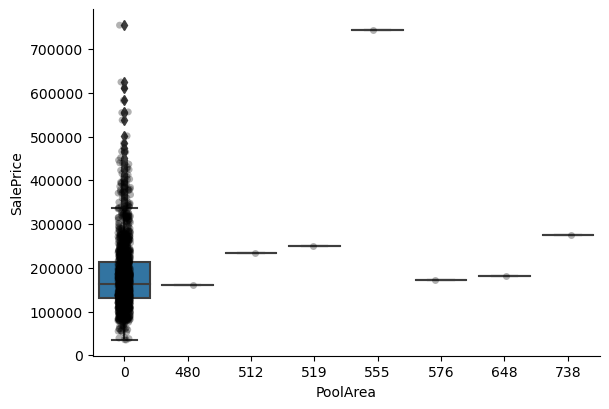

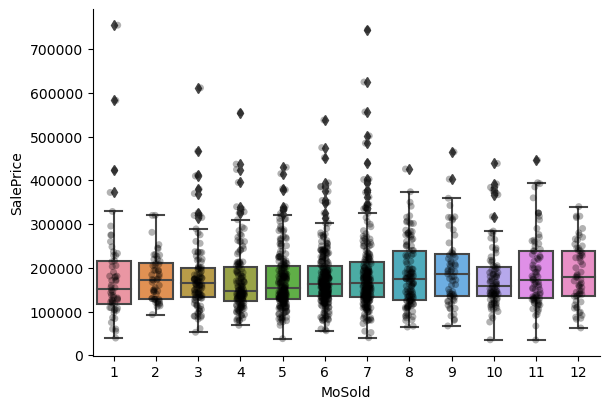

In [28]:
for feature in discrete_features:
    sns.catplot(x=feature, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=feature, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    
    plt.show()
    
# Allows us to see evolution of the price with respect to other discrete features. Each dot represents one house (i.e., SalePrice)

# Continuous Variable

In [29]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + temporal_features]

print('Number of continuous variables: {}'.format(len(continuous_features)))

Number of continuous variables: 18


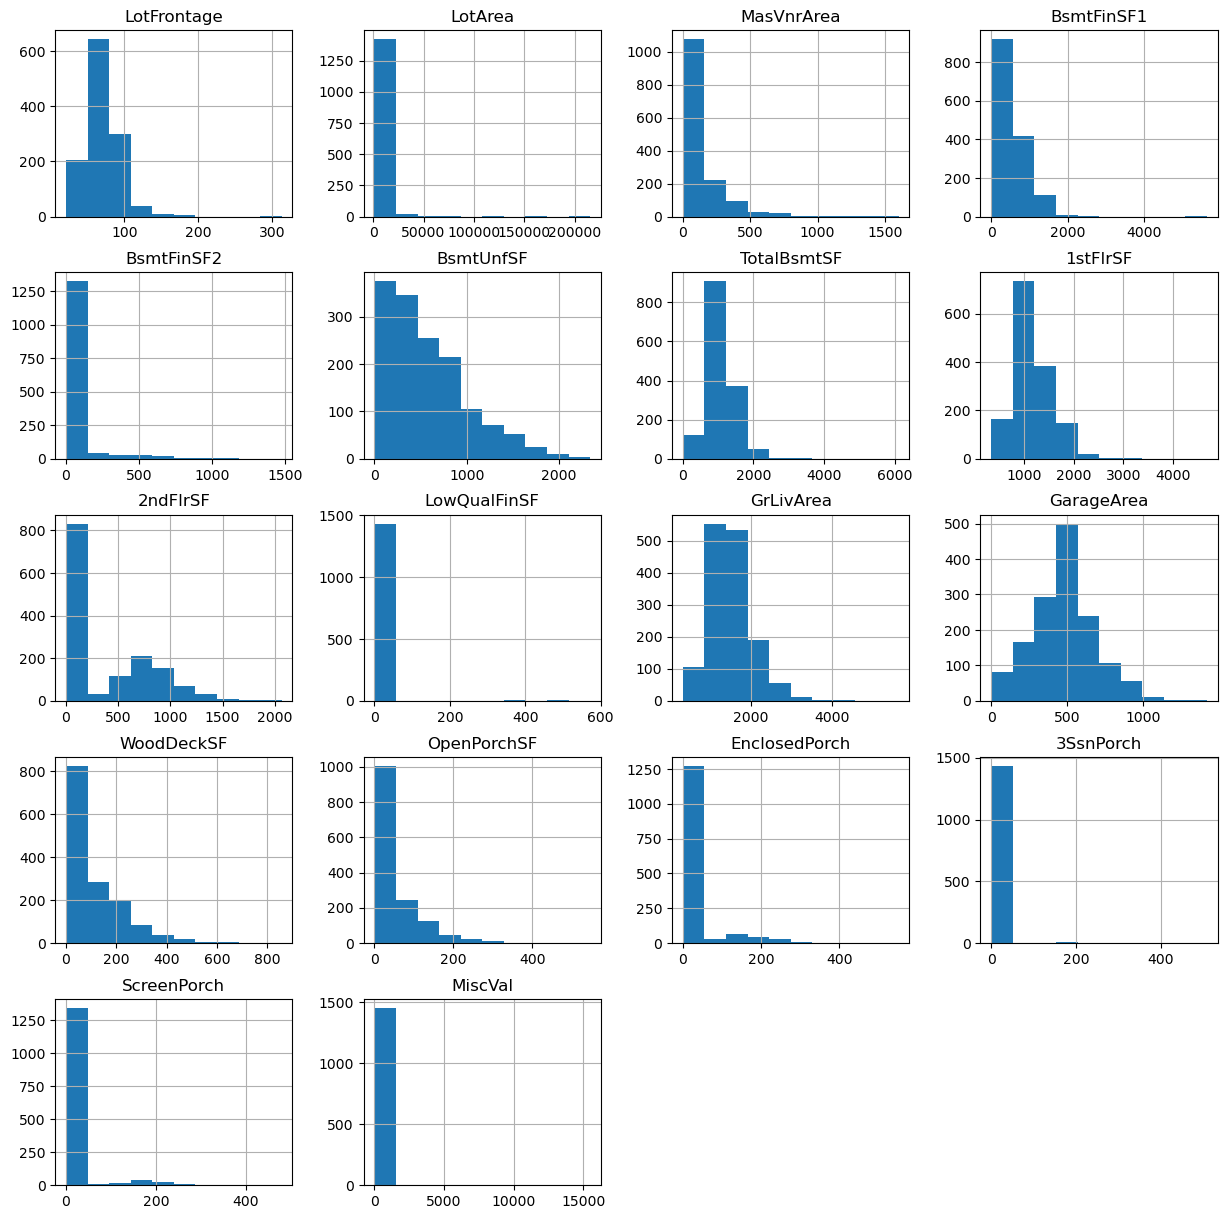

In [30]:
data[continuous_features].hist(figsize=(15, 15))

plt.show()

# Most features are skewed like LotFrontage, BsmtUnSF, etc
# Some features are extremely skewed like LowQualFinSF, 3SsnPorch, ScreenPorch, MiscVal

In [31]:
extremely_skewed_features = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
print(extremely_skewed_features)

['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


In [32]:
continuous_features = [feature for feature in continuous_features if feature not in extremely_skewed_features]
print(continuous_features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


## Yeo-Johnson Transformation (To make features in Gaussian Looking)

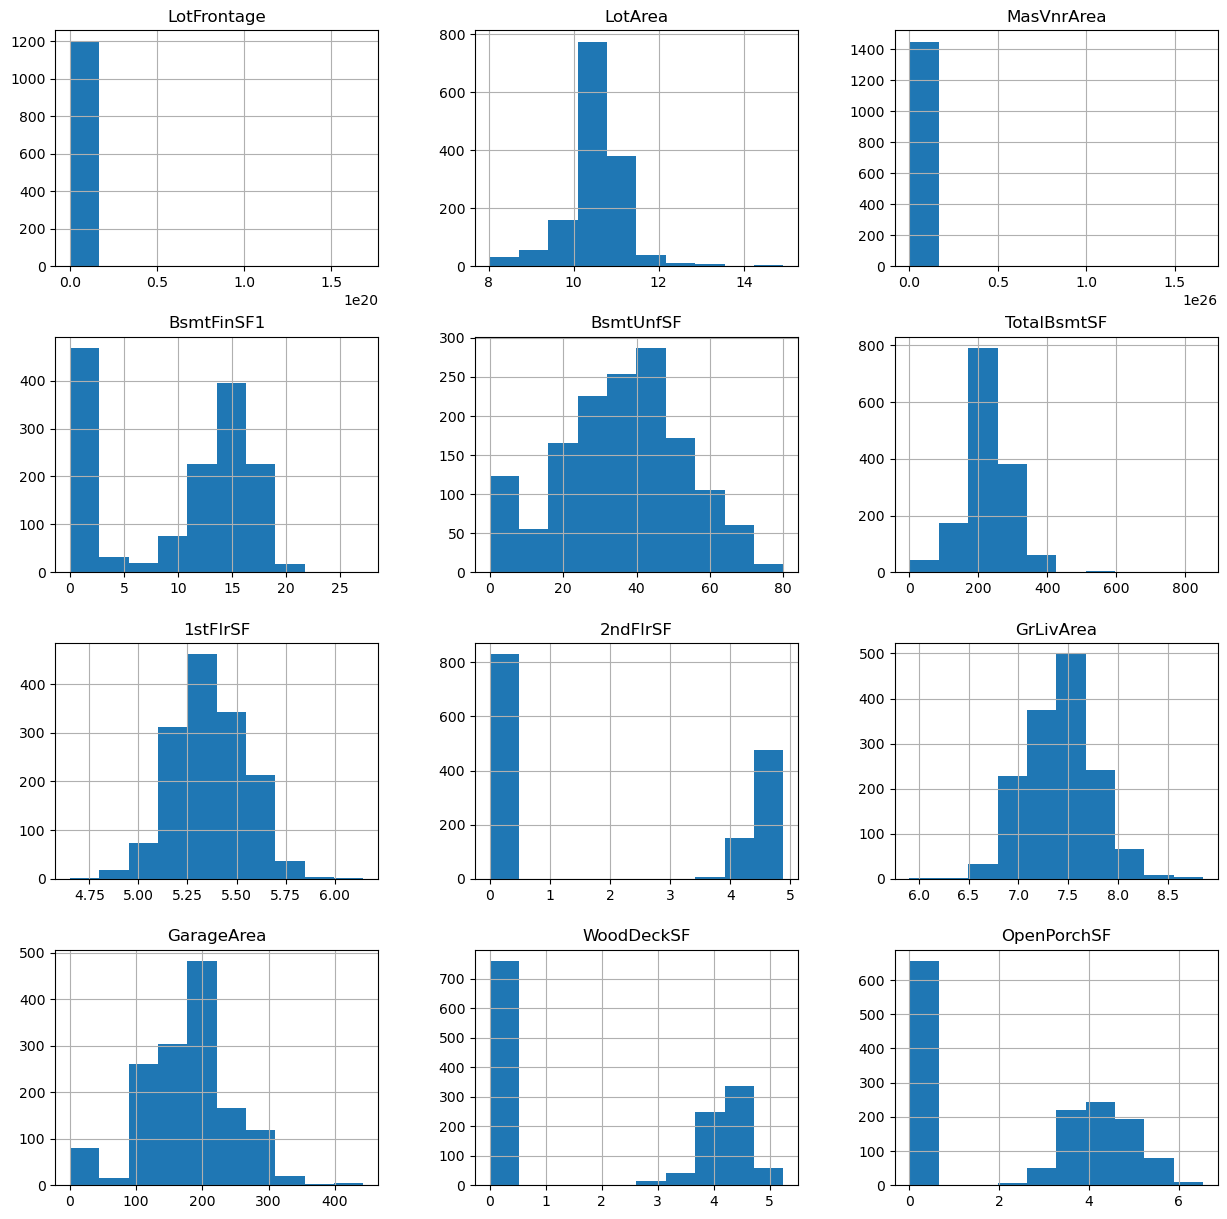

In [33]:
temp_data = data.copy(deep=True)

for feature in continuous_features:
    temp_data[feature], param = stats.yeojohnson(data[feature]) # returns feature and yeo-Johnson Transformation Parameter (The exponent that we use in the Yeo_Johnson transformation to transform the variable)

temp_data[continuous_features].hist(figsize=(15, 15))
plt.show()

### Original and Transformed features vs SalePrice to check there is a relationship

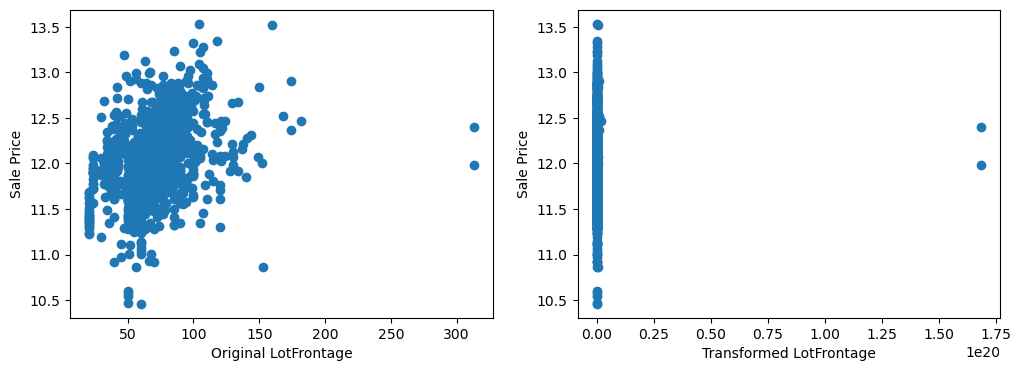

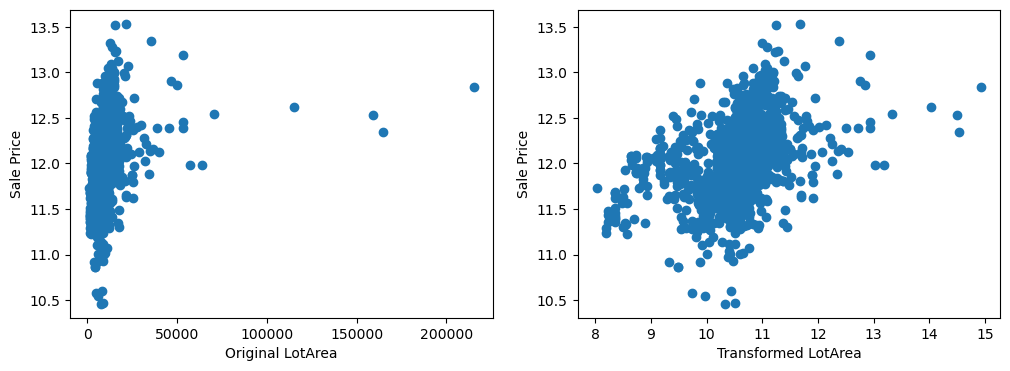

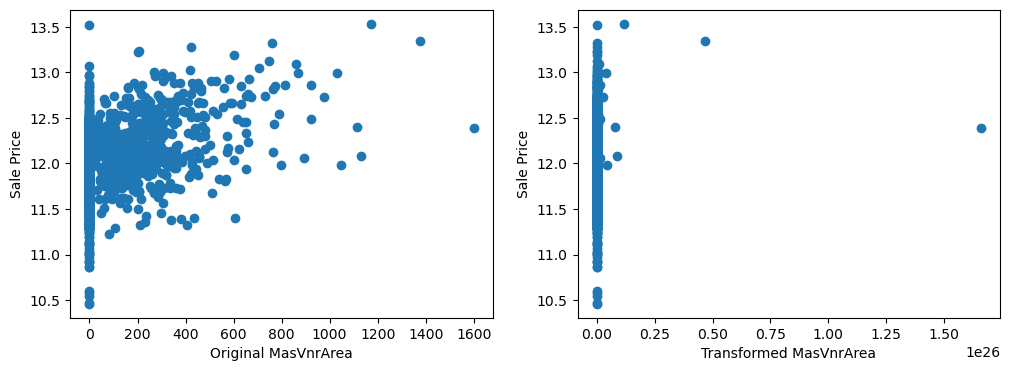

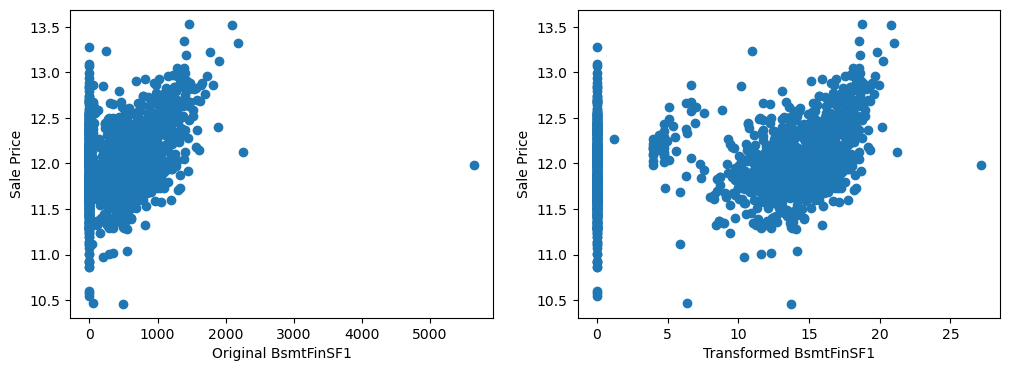

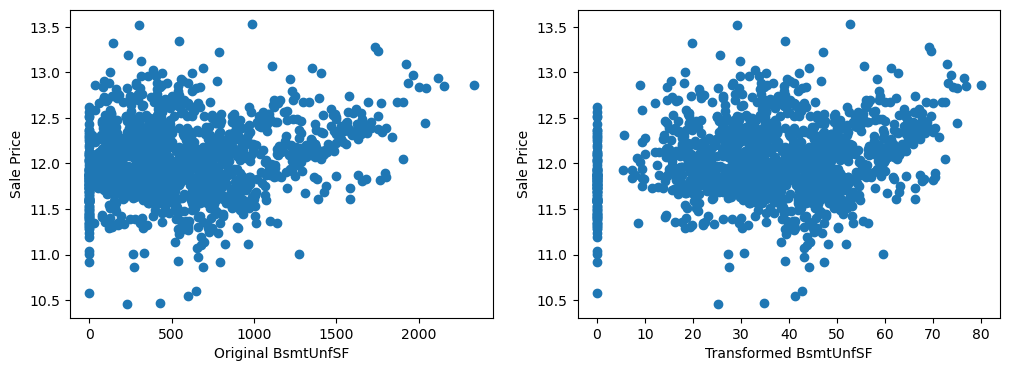

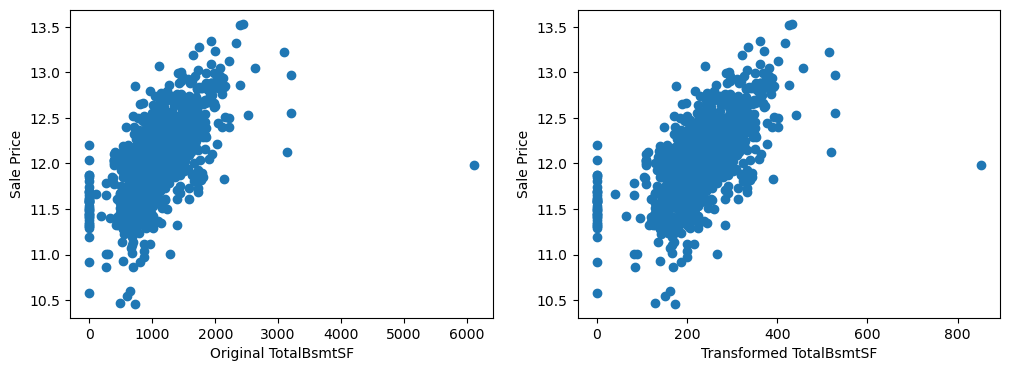

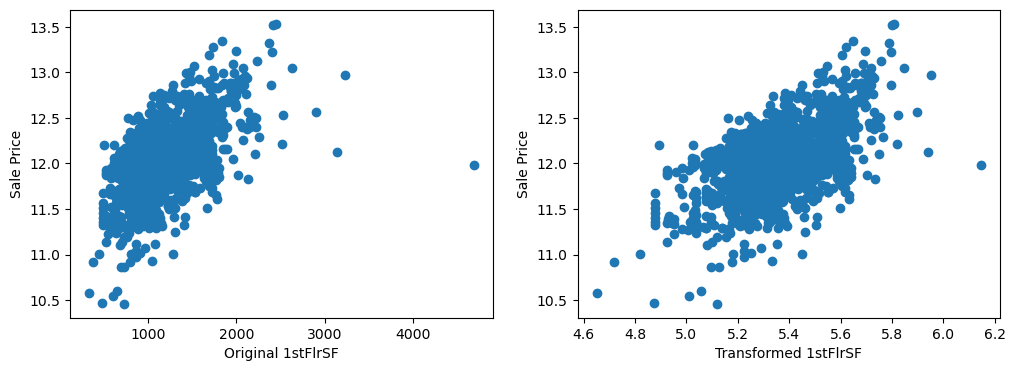

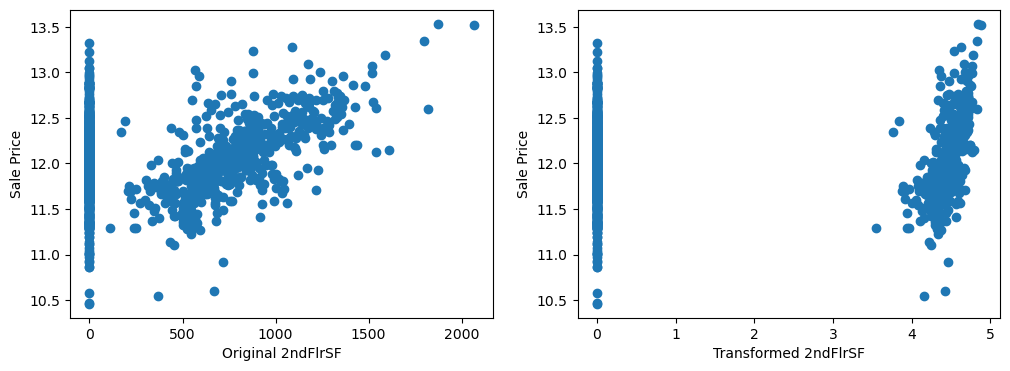

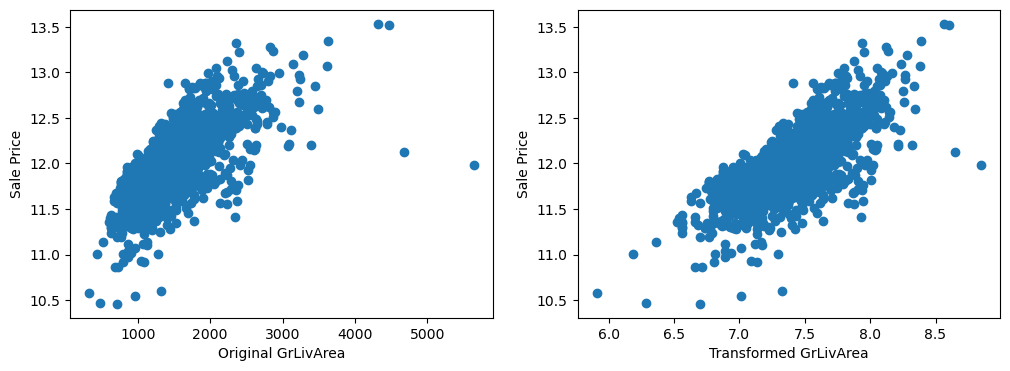

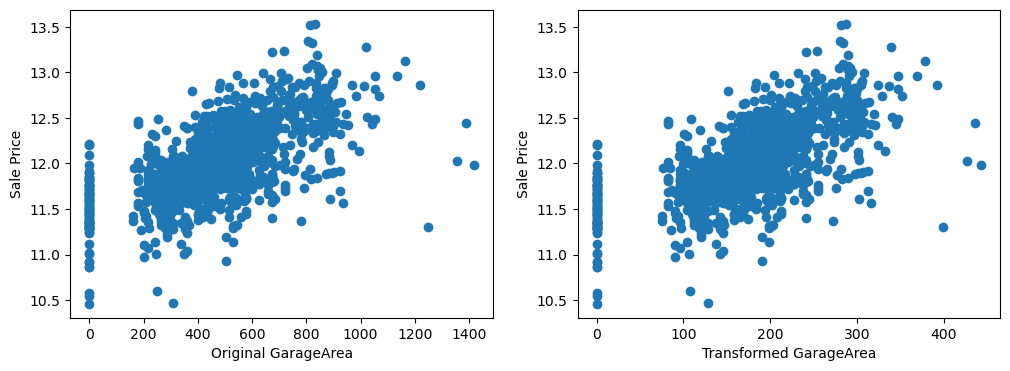

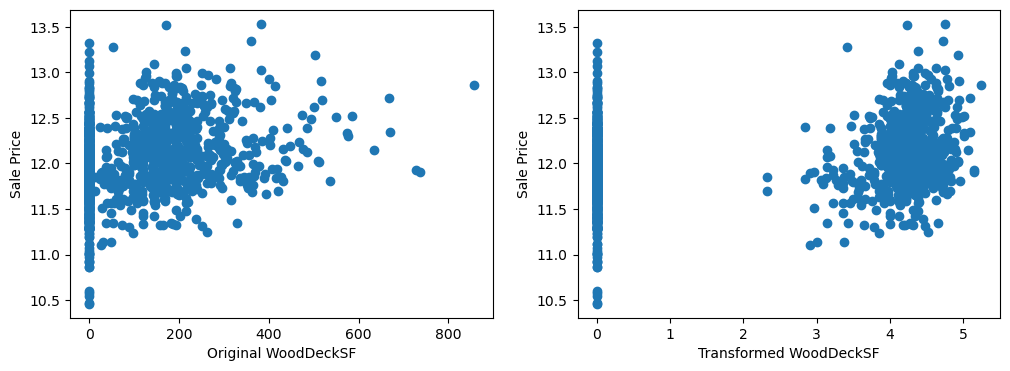

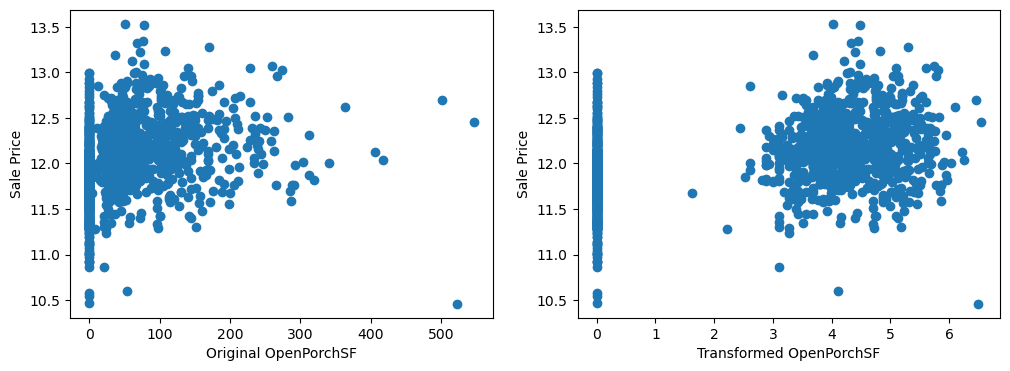

In [34]:
for feature in continuous_features:
    plt.figure(figsize=(12, 4))
    
    # Plotting the Original feature vs SalePrice (Independent Feature)
    plt.subplot(1, 2, 1)
    plt.scatter(data[feature], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + feature)
    
    # Plotting the Transformed feature vs SalePrice (Independent Feature)
    plt.subplot(1, 2, 2)
    plt.scatter(temp_data[feature], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + feature)
    
    plt.show()
    
# Some features are benefited from the Yeo-Johnson transformation like: LotArea, BsmtFinSF1BsmtUnSF, 1stFlrSF, etc. The transeformed values are have good value spread.
# Some features are not benefited from the Yeo-Johnson transformation like: LotFrontage, MasVnrArea, BsmtFinSF2, etc.

## Logarithimic Transformation (To make features more like Gaussian looking)

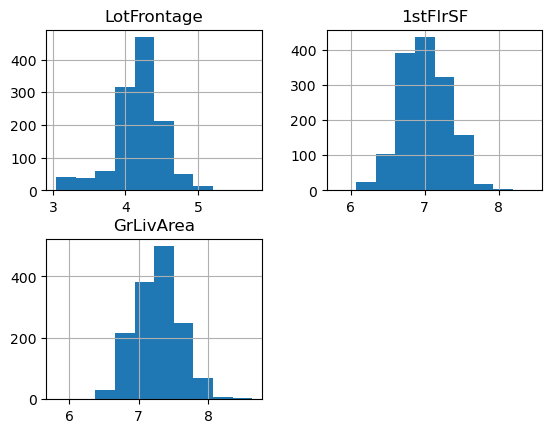

In [35]:
temp_data = data.copy()


for feature in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    temp_data[feature] = np.log(data[feature])

temp_data[['LotFrontage', '1stFlrSF', 'GrLivArea']].hist()

plt.show()


### Original and Transformed features vs SalePrice to check there is a relationship

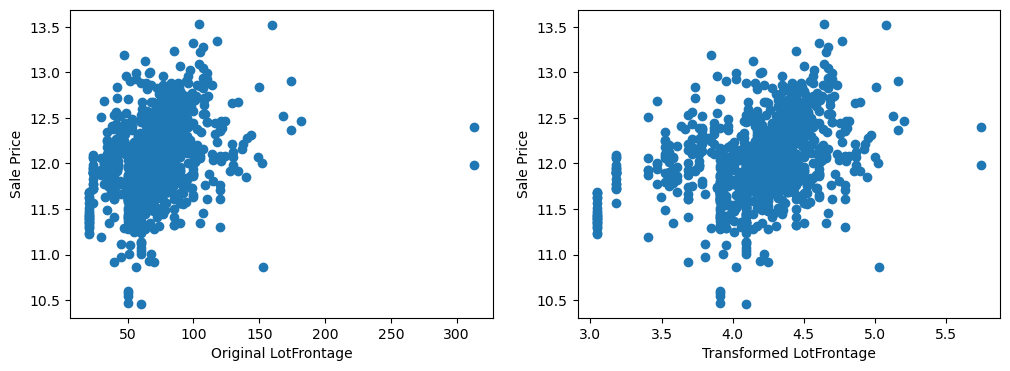

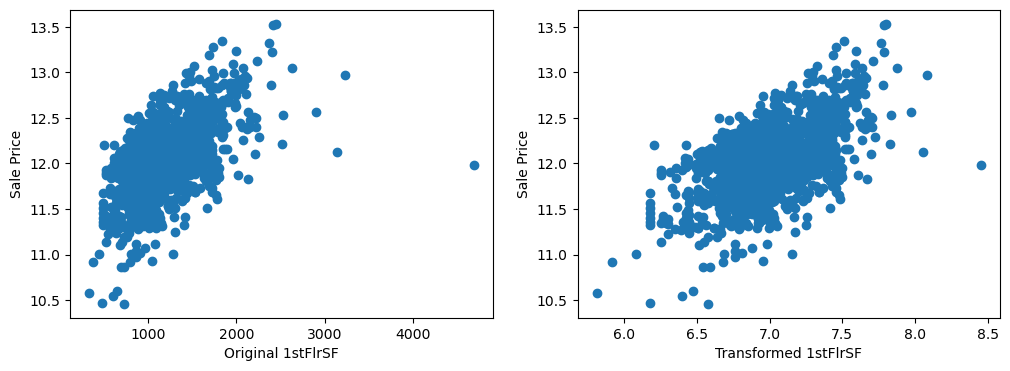

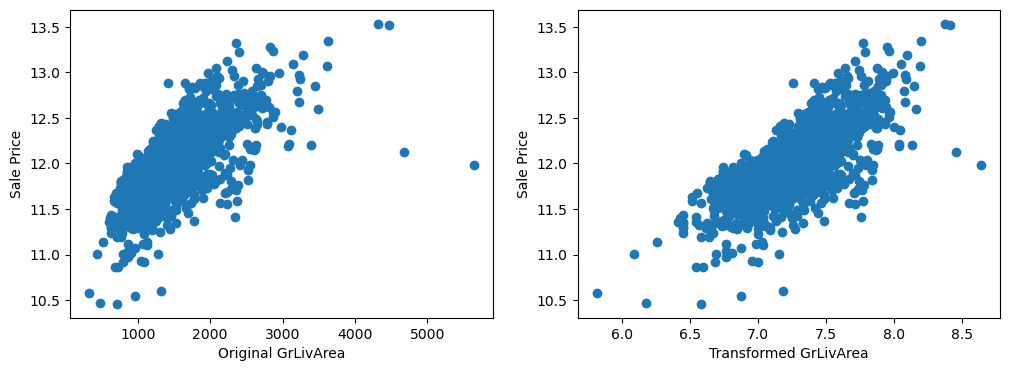

In [36]:
for feature in ['LotFrontage', '1stFlrSF', 'GrLivArea']:
    plt.figure(figsize=(12, 4))
    
    # Plotting the Original feature vs SalePrice (Independent Feature)
    plt.subplot(1, 2, 1)
    plt.scatter(data[feature], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Original ' + feature)
    
    # Plotting the Transformed feature vs SalePrice (Independent Feature)
    plt.subplot(1, 2, 2)
    plt.scatter(temp_data[feature], np.log(data['SalePrice']))
    plt.ylabel('Sale Price')
    plt.xlabel('Transformed ' + feature)
    
    plt.show()

## Binary transformation (Skewed Features / Extremely )

In [3]:
extremely_skewed_features = ['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

In [10]:
data['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

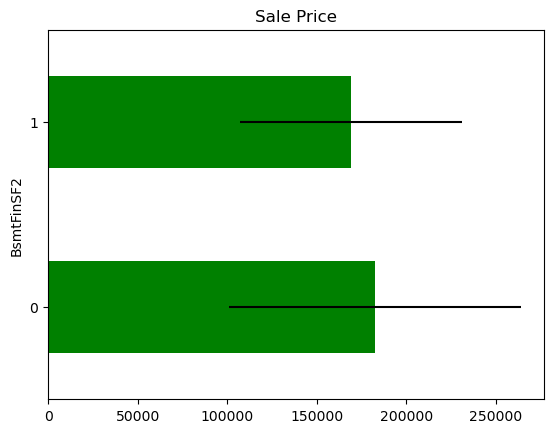

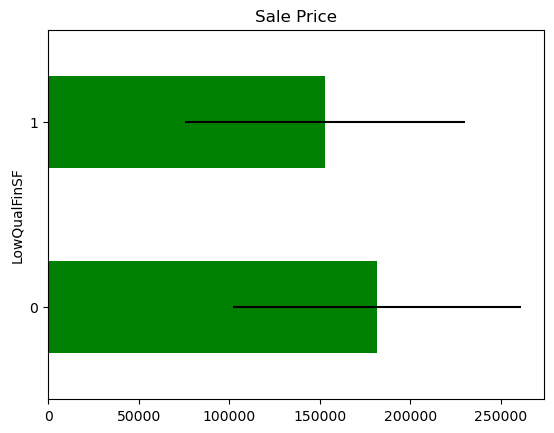

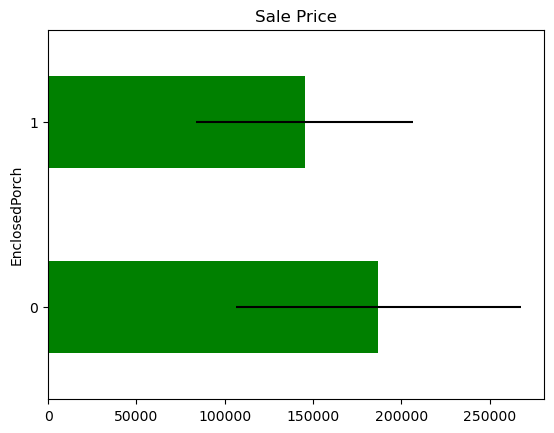

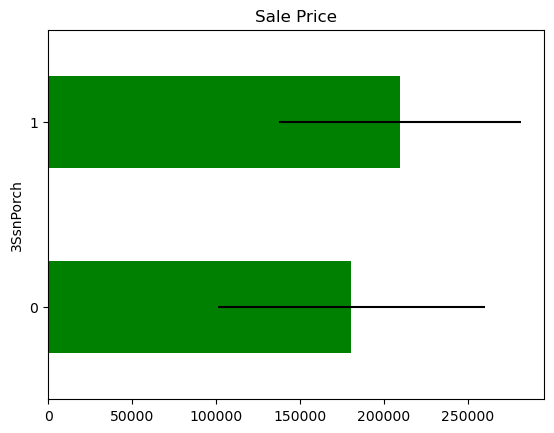

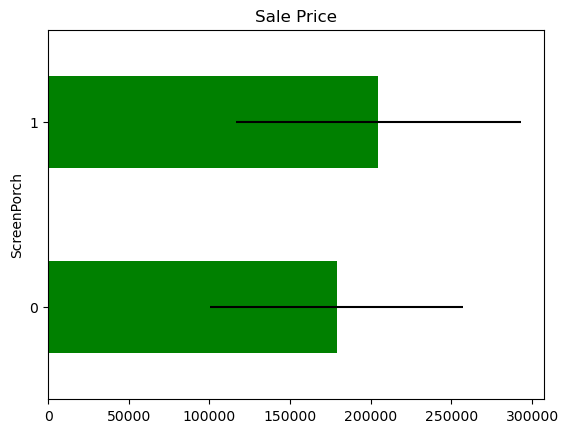

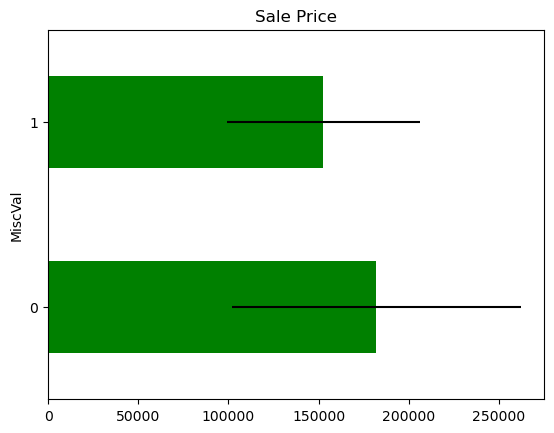

In [37]:
for feature in extremely_skewed_features:
    temp_data = data.copy()
    
    temp_data[feature] = np.where(data[feature]==0, 0, 1) # if a row has a 0 then it will be 0 else 1.
    temp_data = temp_data.groupby(feature)['SalePrice'].agg(['mean', 'std']) # detemine mean sale price in the mapped values.
    
    temp_data.plot(kind='barh', y='mean', legend=False, xerr='std', title='Sale Price', color='green')
    
    plt.show()
    ['BsmtFinType2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

# Categorical Features

In [38]:
print('Number of categoical features: {}'.format(len(categorical_features)))

Number of categoical features: 44


In [39]:
data[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition MSSubClass  
0       WD        Normal         60  
1       WD        Normal         20  
2       WD        Normal         60  
3       WD       Abnorml         70  
4       WD        Normal         60

## Cardinality: Number of labels

### How many Different categories are present in each of the variables.

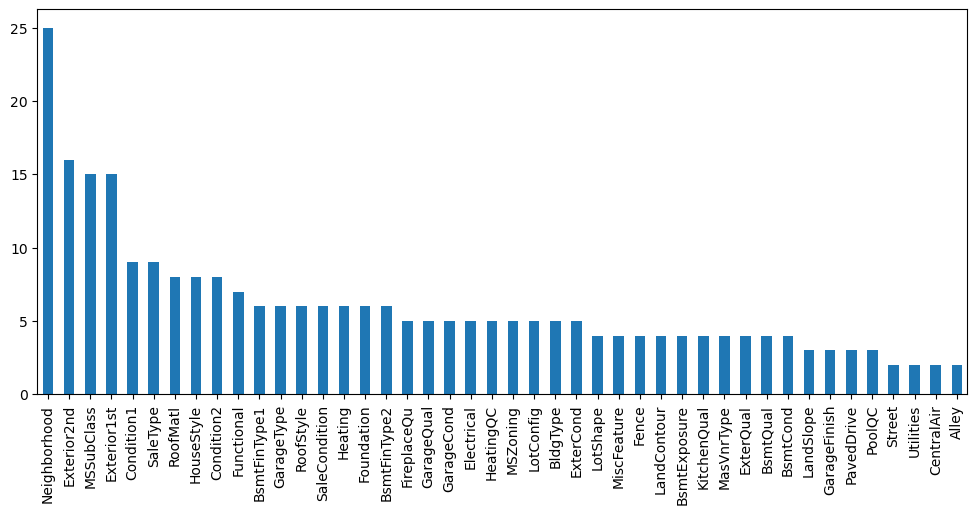

In [40]:
data[categorical_features].nunique().sort_values(ascending=False).plot.bar(figsize=(12, 5))

plt.show()

## Quality Features

### Remapping the strings to numbers, which determine quantity (All these are given in data_description.txt file)

In [41]:
quality_mapping = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}


# Quality Features in our dataset are:
quality_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

for feature in quality_features:
    data[feature] = data[feature].map(quality_mapping)

# For "BsmtExposure"
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}
feature = 'BsmtExposure'

data[feature] = data[feature].map(exposure_mappings)

# For "['BsmtFinType1', 'BsmtFinType2']"
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
finish_features = ['BsmtFinType1', 'BsmtFinType2']

for feature in finish_features:
    data[feature] = data[feature].map(finish_mappings)
    
# For "GarageFinish"
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
feature = 'GarageFinish'

data[feature] = data[feature].map(garage_mappings)

# For "Fence"
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}
feature = 'Fence'

data[feature] = data[feature].map(fence_mappings)

# Capturing all quality features
quality_features  = quality_features + finish_features + ['BsmtExposure', 'GarageFinish', 'Fence']

### Plotting the house mean sale based on the quality.

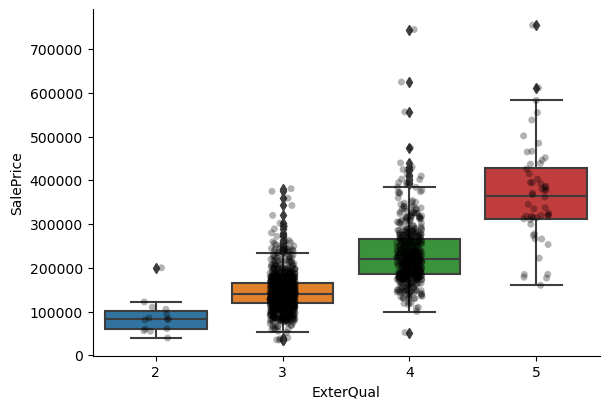

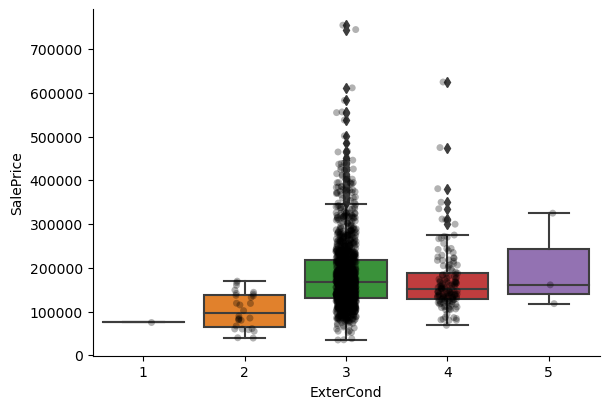

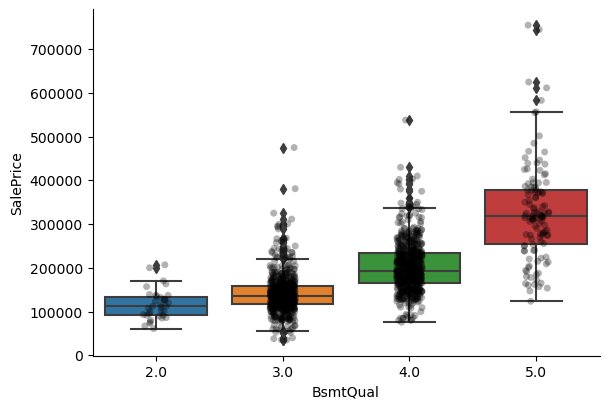

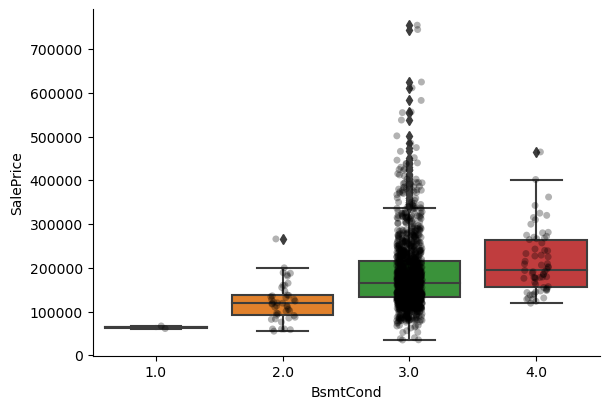

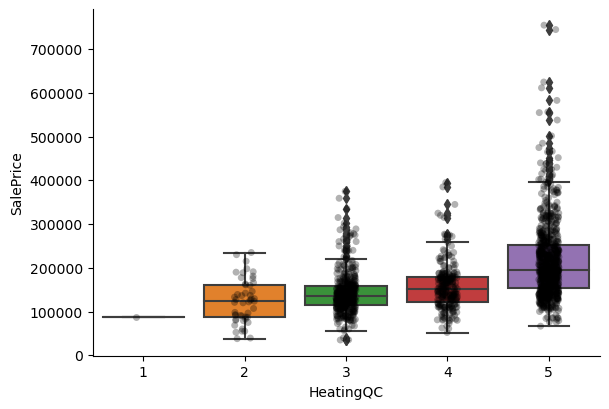

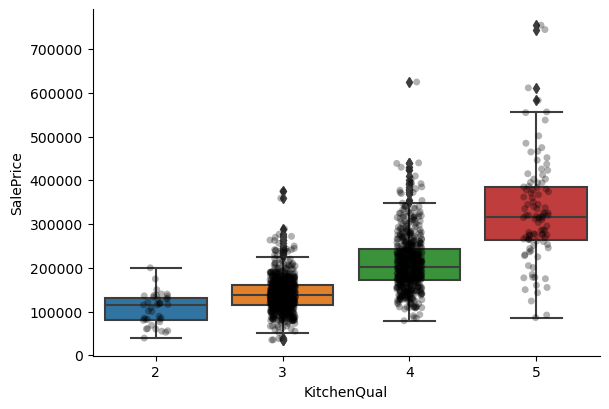

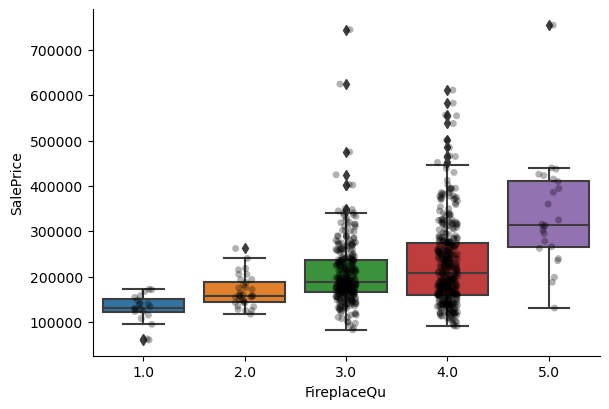

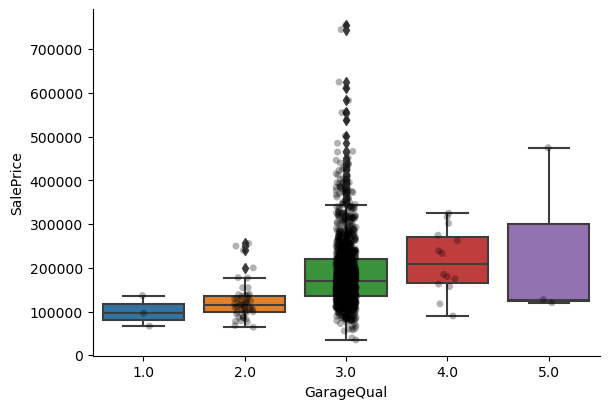

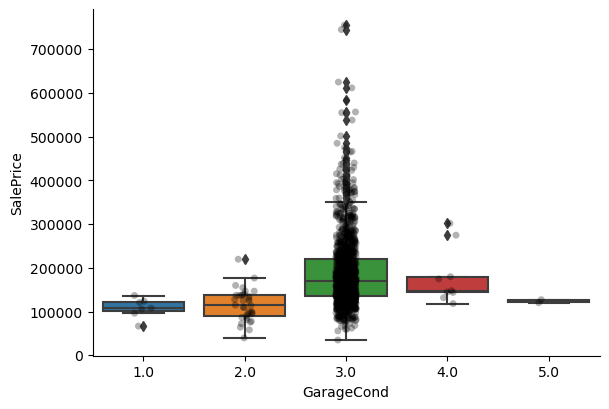

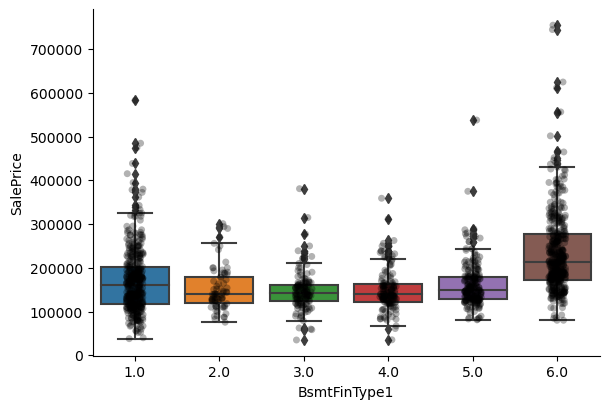

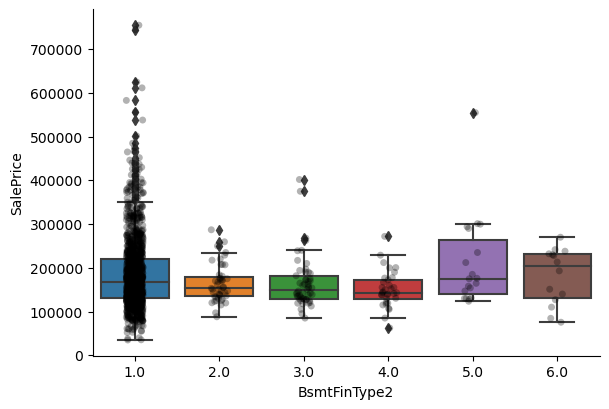

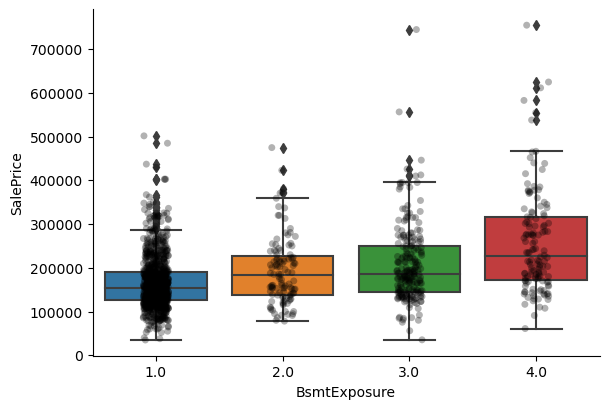

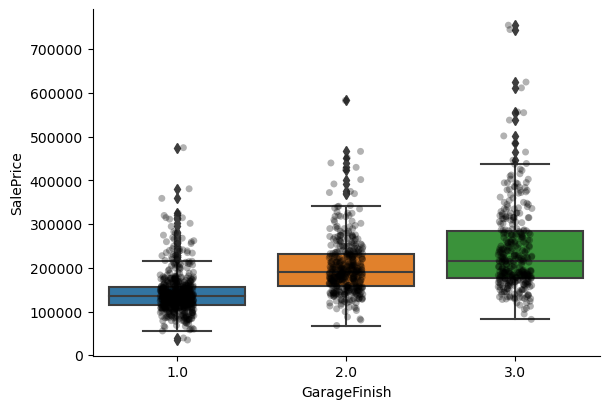

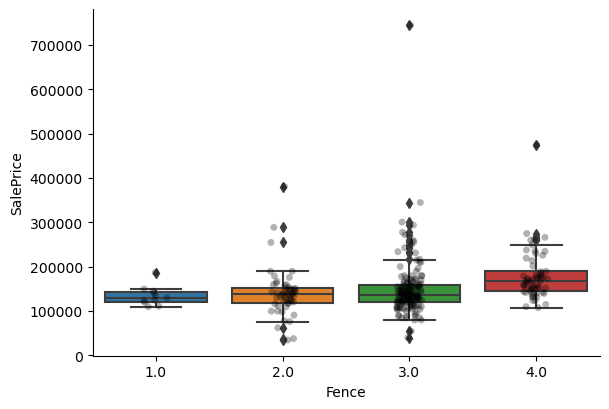

In [42]:
for feature in quality_features:
    sns.catplot(x=feature, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=feature, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    
    plt.show()

### Features that are not remapped (Didn't give by kaggle in data_description.txt)

In [43]:
remaining_categorical_features = [feature for feature in categorical_features if feature not in quality_features]

print("Number of features that are not re-mapped: {}".format(len(remaining_categorical_features)))

Number of features that are not re-mapped: 30


## Rare Labels (Categories which are not re-mapped, Examine the presernce of rare labels)

### If there are labels that are present only in a small number of obervations, they are called rare labels/values.

In [45]:
def analyse_rare_labels(df, feature, rare_precentage):
    df = data.copy()
    
    # Detemining the percentage of observation per category.
    temp_data = df.groupby(feature)['SalePrice'].count() / len(df) # Instead of SalePrice any feature can be placed because we are just counting the no.of times a category repeated. 
    
    # returns categories that are rare.
    return temp_data[temp_data < rare_precentage]

# Print categories that are present in less than 1% of observations
for feature in remaining_categorical_features:
    print(analyse_rare_labels(data, feature, 0.01))

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64
Street
Grvl    0.00411
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
LotShape
IR3    0.006849
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64
LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64
LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64
Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64
Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64
Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64
Series([], Name: SalePrice, dtype: float64)
HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64
RoofStyle
Flat       0.0089

In [52]:
data.groupby('MSZoning').count()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  \
MSZoning                                                              
C (all)           10           10       10      10      2        10   
FV                65           57       65      65     24        65   
RH                16           13       16      16      2        16   
RL              1151          922     1151    1151     20      1151   
RM               218          199      218     218     43       218   

          LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
MSZoning                                                               
C (all)            10         10         10         10            10   
FV                 65         65         65         65            65   
RH                 16         16         16         16            16   
RL               1151       1151       1151       1151          1151   
RM                218        218        218        218           218   

          Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
MSZoning                                                              
C (all)           10          10        10          10           10   
FV                65          65        65          65           65   
RH                16          16        16          16           16   
RL              1151        1151      1151        1151         1151   
RM               218         218       218         218          218   

          OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  \
MSZoning                                                              
C (all)            10         10            10         10        10   
FV                 65         65            65         65        65   
RH                 16         16            16         16        16   
RL               1151       1151          1151       1151      1151   
RM                218        218           218        218       218   

          Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
MSZoning                                                                
C (all)            10           10          10          10         10   
FV                 65           65          62          62         65   
RH                 16           16          16          16         16   
RL               1151         1151        1146        1146       1151   
RM                218          218         218         218        218   

          ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
MSZoning                                                            
C (all)          10          10        10        10            10   
FV               65          65        65        65            65   
RH               16          16        15        15            15   
RL             1151        1151      1119      1119          1118   
RM              218         218       214       214           214   

          BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
MSZoning                                                                  
C (all)             10          10            10          10         10   
FV                  65          65            65          65         65   
RH                  15          16            15          16         16   
RL                1119        1151          1118        1151       1151   
RM                 214         218           214         218        218   

          TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  \
MSZoning                                                                      
C (all)            10       10         10          10          10        10   
FV                 65       65         65          65          65        65   
RH                 16       16         16          16          16        16   
RL               1151     1151       1151        1151        1150      1151   
RM             

In [53]:
data.groupby('MSZoning')['SalePrice'].count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64

### Importance of Rare Labels

### Relationship between the categories of the different features and the house sale price.

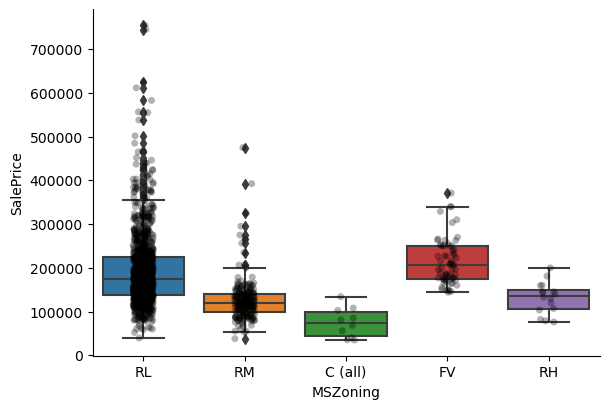

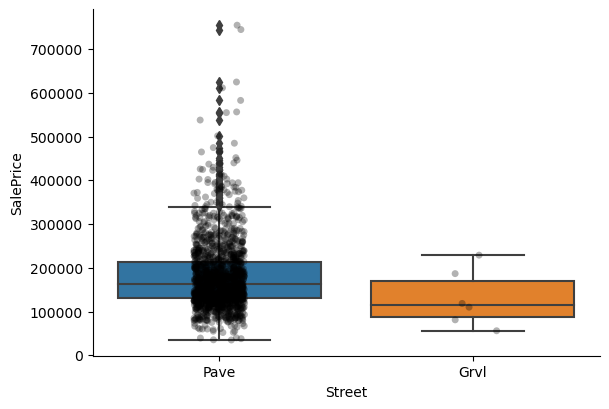

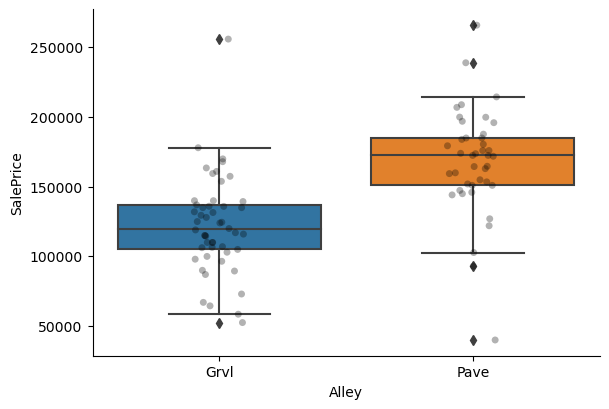

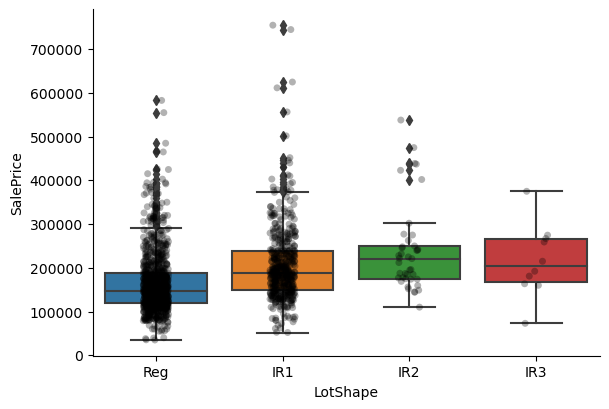

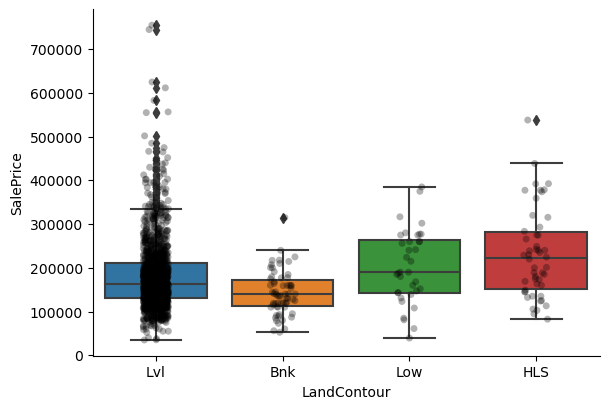

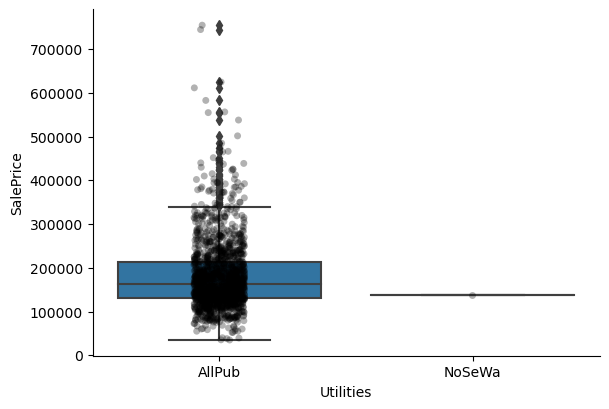

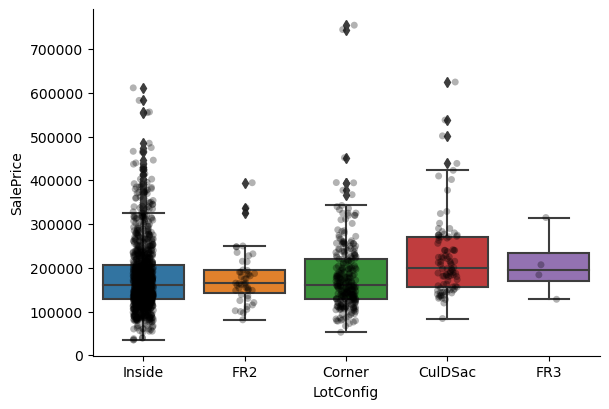

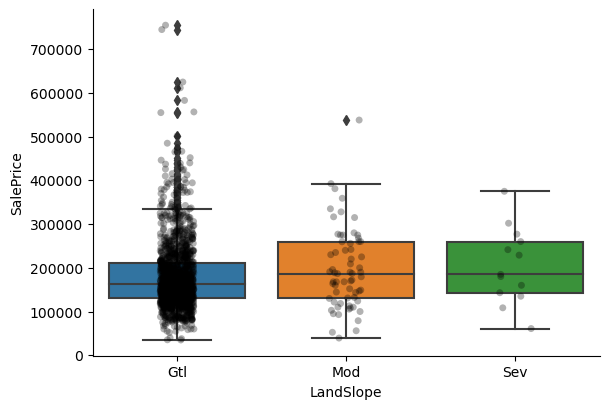

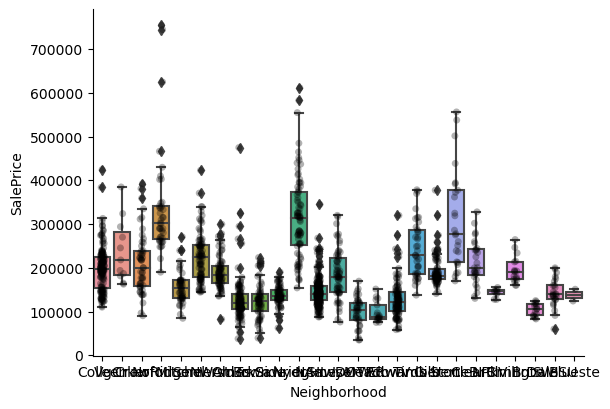

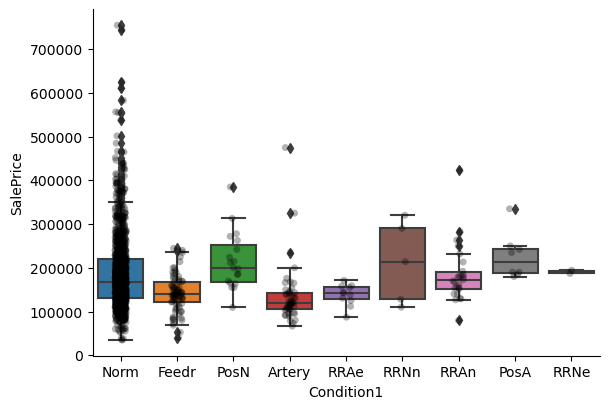

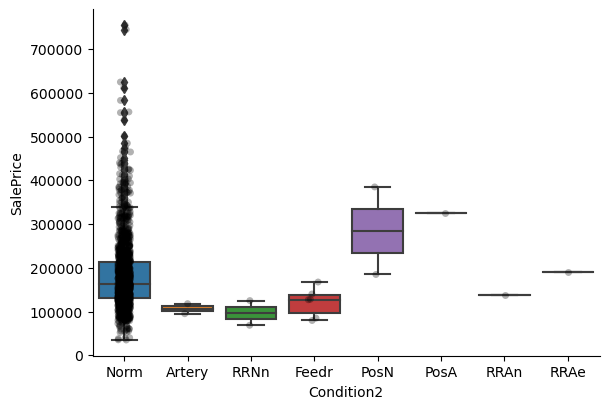

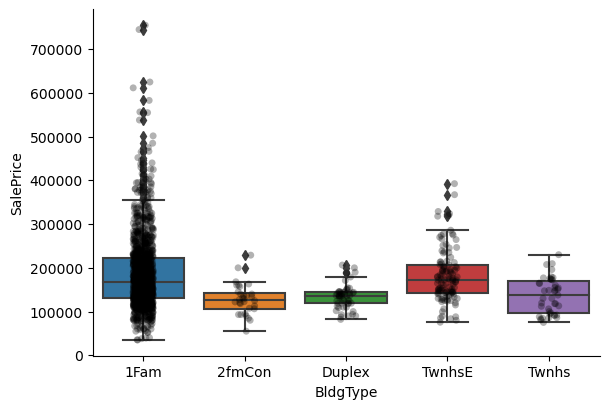

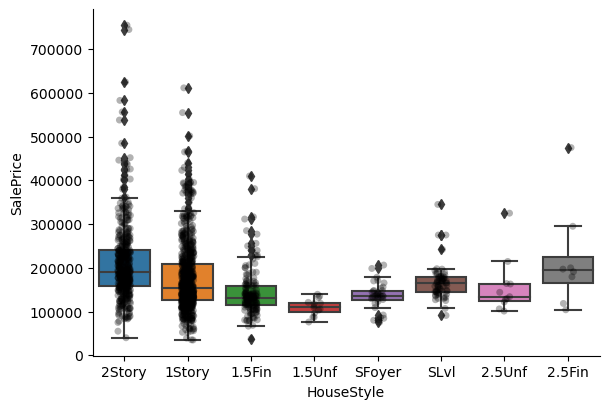

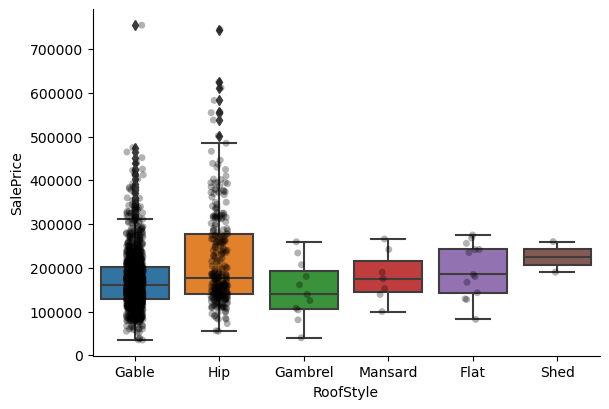

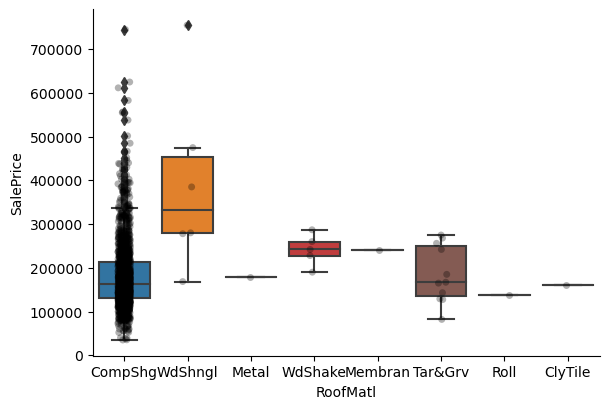

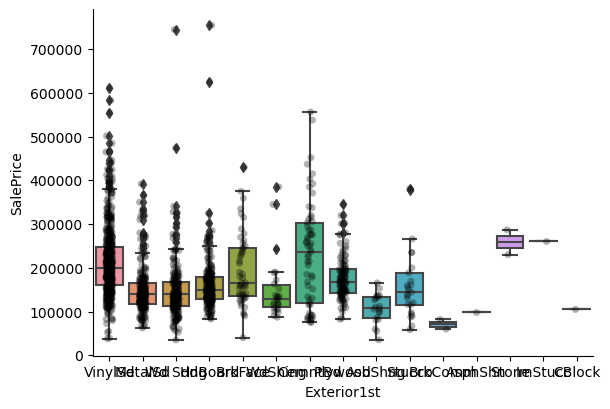

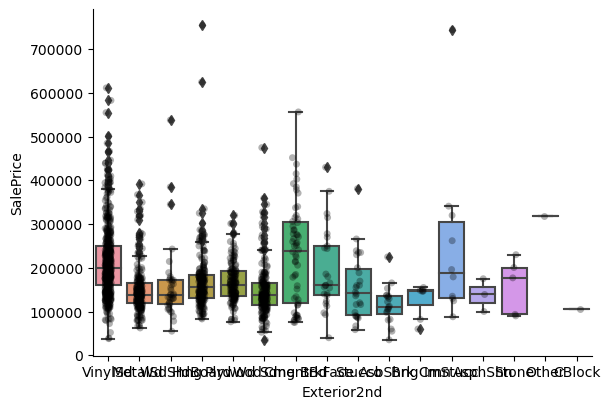

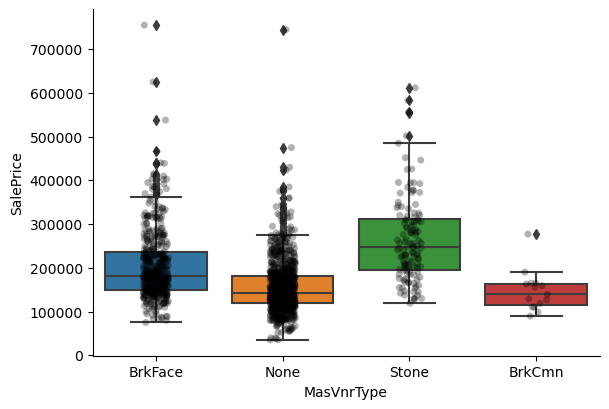

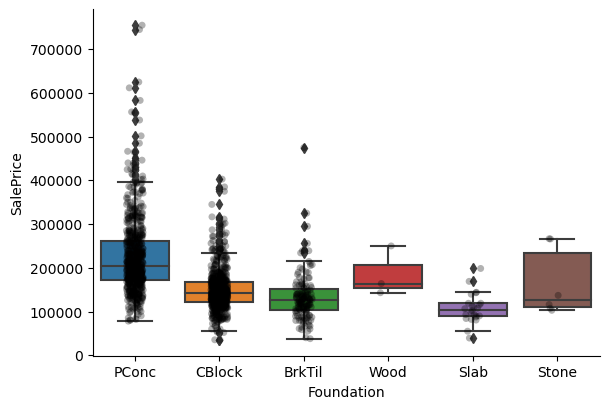

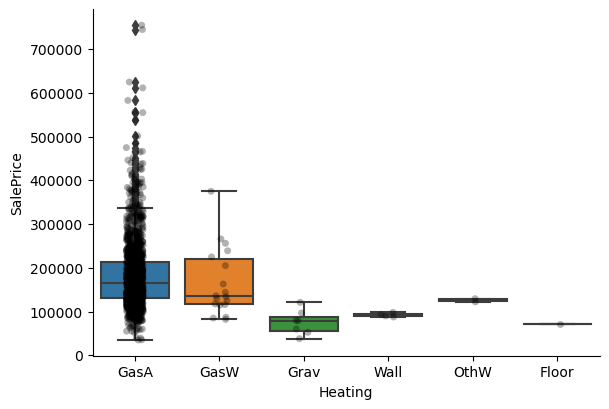

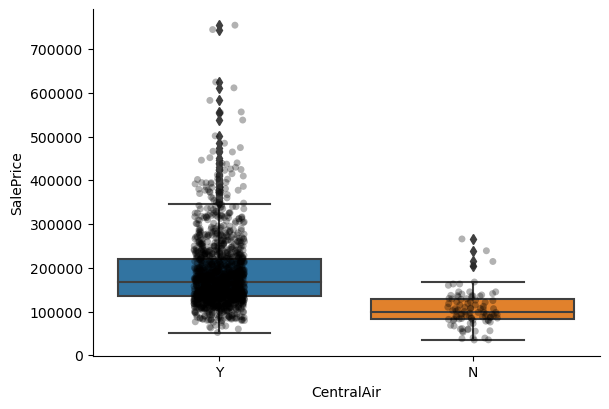

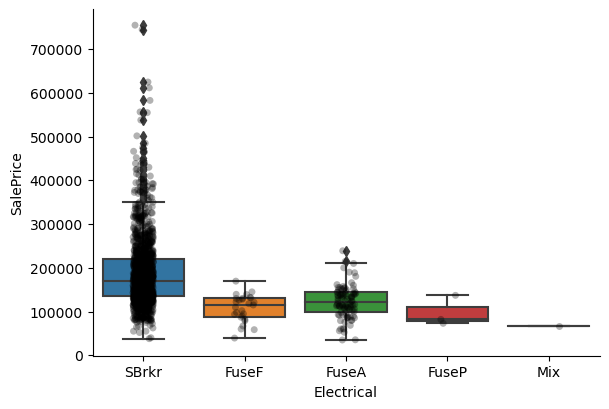

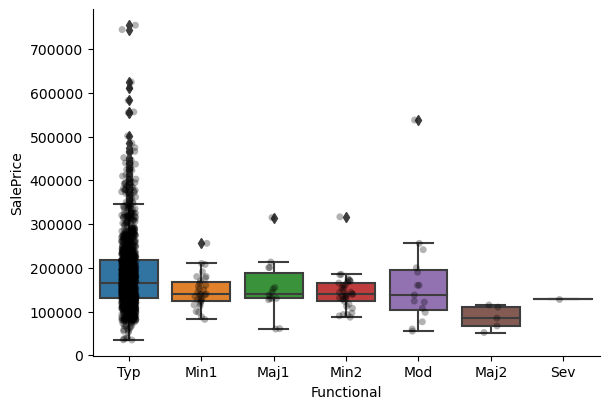

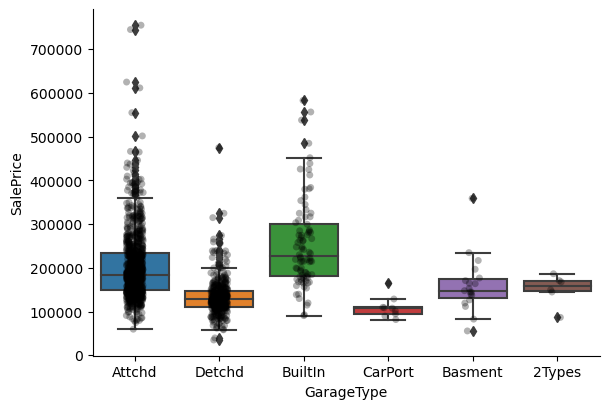

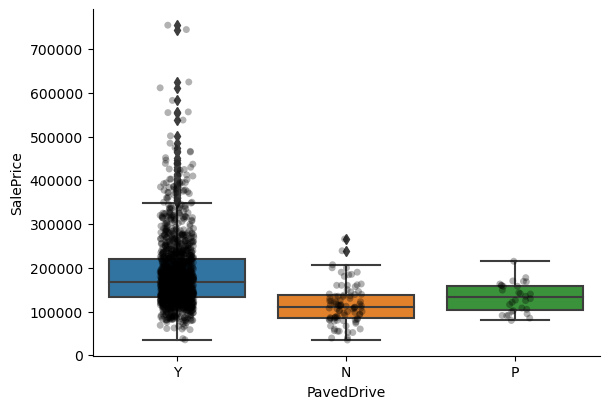

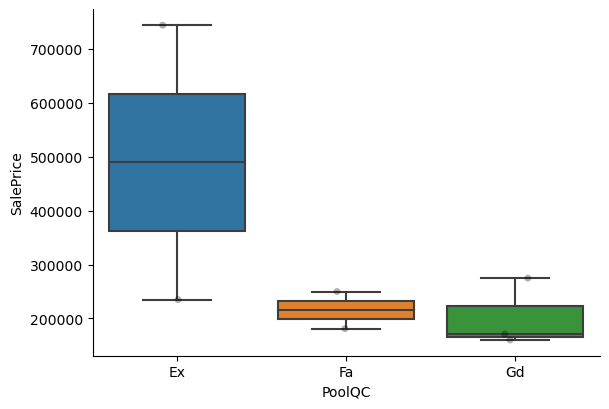

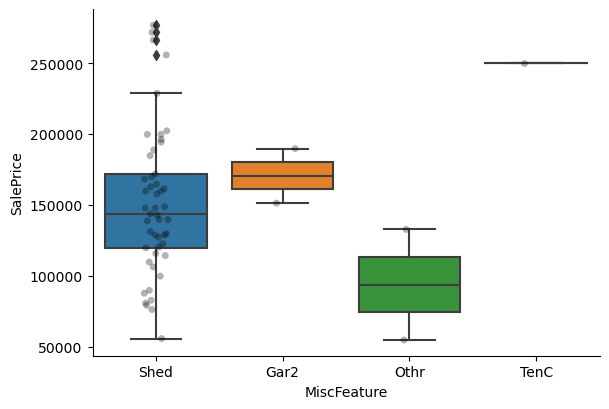

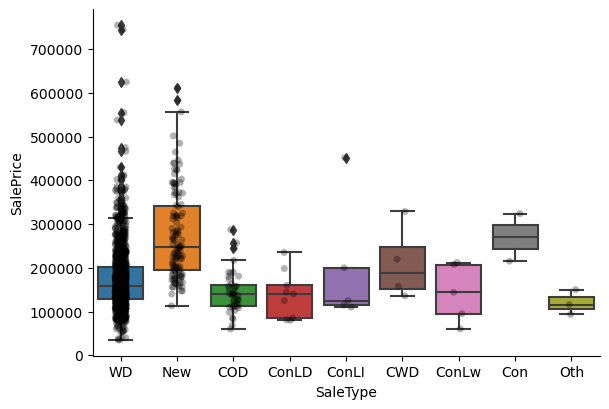

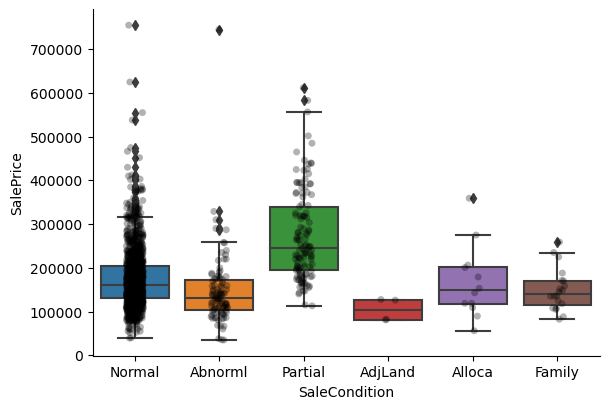

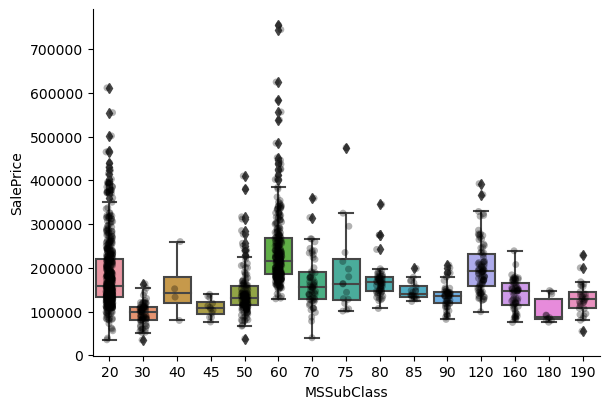

In [54]:
for feature in remaining_categorical_features:
    sns.catplot(x=feature, y='SalePrice', data=data, kind='box', height=4, aspect=1.5)
    sns.stripplot(x=feature, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    
    plt.show()